In [2]:
import sqlite3
import pandas as pd

sqliteConnection = sqlite3.connect('C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj')

cursor = sqliteConnection.cursor()

result = cursor.fetchall()




In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


                   Fornecedor  Total de Compras  Total de Itens Comprados  \
0           Casa Delícia LTDA                16                      6666   
1           Casa Delícia LTDA                16                      6666   
2           Casa Delícia LTDA                16                      6666   
3           Casa Delícia LTDA                16                      6666   
4           Casa Delícia LTDA                16                      6666   
5           Casa Delícia LTDA                16                      6666   
6   Empório Imperial Comércio                16                      6058   
7   Empório Imperial Comércio                16                      6058   
8      Alimentos Forte EIRELI                17                      5620   
9      Alimentos Forte EIRELI                17                      5620   
10           Casa Fresco LTDA                16                      5893   
11           Casa Fresco LTDA                16                      5893   

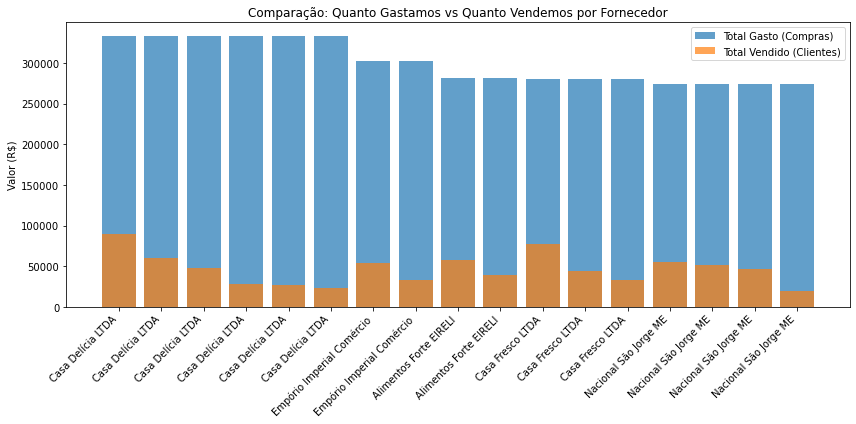

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do banco
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# Views existentes
VIEW_COMPRAS = "Fornecedores_Mais_Importantes"
VIEW_VENDAS = "Produtos_Dos_Fornecedores_Vendidos_Para_Clientes"


def get_data():
    conn = sqlite3.connect(DB_PATH)

    df_compras = pd.read_sql_query(f"SELECT * FROM {VIEW_COMPRAS};", conn)
    df_vendas = pd.read_sql_query(f"SELECT * FROM {VIEW_VENDAS};", conn)

    conn.close()
    return df_compras, df_vendas


def preparar_dados():
    df_compras, df_vendas = get_data()

    # Renomeando colunas para evitar conflitos
    df_compras = df_compras.rename(columns={
        "Fornecedor": "Fornecedor",
        "Valor Total Gasto": "Total_Gasto"
    })

    df_vendas = df_vendas.rename(columns={
        "forn_nome": "Fornecedor",
        "Total_Vendido": "Total_Vendido"
    })

    # Juntando compras e vendas por fornecedor
    df = pd.merge(df_compras, df_vendas, on="Fornecedor", how="left")

    # Se algum fornecedor não tiver venda, vira 0
    df["Total_Vendido"] = df["Total_Vendido"].fillna(0)

    return df


def gerar_grafico(df):
    plt.figure(figsize=(12, 6))

    fornecedores = df["Fornecedor"]
    gastos = df["Total_Gasto"]
    vendas = df["Total_Vendido"]

    x = range(len(fornecedores))

    plt.bar(x, gastos, label="Total Gasto (Compras)", alpha=0.7)
    plt.bar(x, vendas, label="Total Vendido (Clientes)", alpha=0.7)

    plt.xticks(x, fornecedores, rotation=45, ha="right")
    plt.ylabel("Valor (R$)")
    plt.title("Comparação: Quanto Gastamos vs Quanto Vendemos por Fornecedor")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Execução
df_final = preparar_dados()
print(df_final)
gerar_grafico(df_final)



In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'
VIEW_NAME = 'Media_Salarial_por_Setor_e_de_funcionários'

col_setor = "Nome do Setor"
col_salario = "Salário do Funcionário"
col_media = "Média Salarial do Setor"

try:
    conn = sqlite3.connect(DB_PATH)
    query = f'SELECT * FROM {VIEW_NAME}'
    df = pd.read_sql(query, conn)
    conn.close()

    df_medias = df.drop_duplicates(subset=[col_setor]).sort_values(by=col_media, ascending=False)
    ordem_setores = df_medias[col_setor].tolist()

    plt.figure(figsize=(12, 6))

    sns.boxplot(
        x=col_setor, 
        y=col_salario, 
        data=df, 
        order=ordem_setores,
        color="skyblue", 
        width=0.4
    )

    sns.stripplot(
        x=col_setor, 
        y=col_salario, 
        data=df, 
        order=ordem_setores,
        color="darkblue",
        jitter=0.2,
        size=6,
        alpha=0.7
    )

    sns.scatterplot(
        x=df_medias[col_setor], 
        y=df_medias[col_media], 
        marker='D',
        color='red', 
        s=180, 
        zorder=5, 
        label='Média Salarial do Setor'
    )
    
    plt.title('Distribuição Salarial por Setor: Salários Individuais vs. Média', fontsize=16, pad=20)
    plt.xlabel('Setor', fontsize=12)
    plt.ylabel('Salário (R$)', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Erro ao carregar ou gerar gráfico: {e}")

IndentationError: expected an indented block (Temp/ipykernel_13864/3920545245.py, line 59)

Dados dos 10 funcionários de baixa performance carregados com sucesso.
Gráfico 'analise_baixa_performance_sqlite.png' salvo com sucesso.


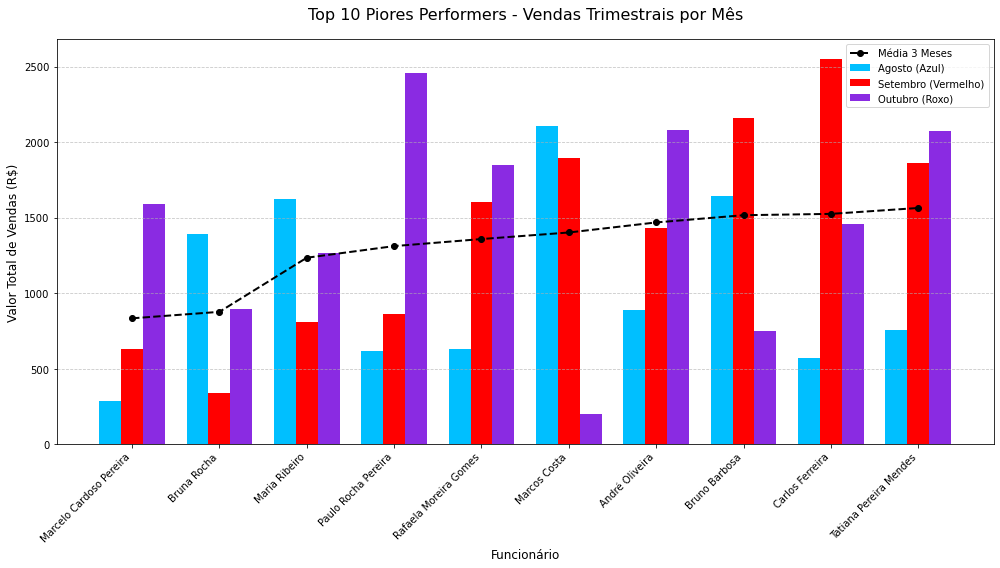

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 
import numpy as np

# --- Configuração do Banco de Dados ---
# Substitua 'seu_banco.db' pelo nome real do seu arquivo SQLite
DB_FILE = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj' 

def get_low_performers_data():
    """
    Conecta ao banco de dados SQLite e consulta a VIEW Baixa_Performance_Trimestral.
    A consulta busca os 10 funcionários com a menor média, 
    conforme definido na sua VIEW (apenas aqueles com vendas nos 3 meses).
    """
    conn = None
    df = pd.DataFrame()
    
    # A VIEW já faz a filtragem para "Media Ultimo 3 Meses" IS NOT NULL e a ordenação.
    # Aqui, apenas limitamos aos 10 primeiros.
    SQL_QUERY = """
    SELECT 
        "Nome do funcionário", 
        "Vendas em Agosto", 
        "Vendas em Setembro", 
        "Vendas em Outubro", 
        "Media Ultimo 3 Meses"
    FROM 
        Baixa_Performance_Trimestral
    LIMIT 10;
    """
    
    try:
        # Conecta ao arquivo SQLite
        conn = sqlite3.connect(DB_FILE)
        
        # Lê os dados da VIEW
        df = pd.read_sql_query(SQL_QUERY, conn)
        
        print(f"Dados dos 10 funcionários de baixa performance carregados com sucesso.")
        
    except sqlite3.Error as error:
        print(f"❌ Erro ao acessar o banco de dados SQLite: {error}")
        return pd.DataFrame()
        
    finally:
        if conn is not None:
            conn.close()
            
    return df

def plot_low_performance(df):
    """Gera um gráfico de barras agrupadas para demonstrar a baixa performance."""
    if df.empty:
        print("Não há dados para plotar.")
        return

    # Define o nome do funcionário como índice
    df.set_index('Nome do funcionário', inplace=True)
    
    fig, ax = plt.subplots(figsize=(14, 8))

    # Largura e posições das barras
    bar_width = 0.25
    r1 = np.arange(len(df))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plotagem das barras por mês
    ax.bar(r1, df['Vendas em Agosto'], color='#00bfff', width=bar_width, label='Agosto (Azul)')
    ax.bar(r2, df['Vendas em Setembro'], color='#ff0000', width=bar_width, label='Setembro (Vermelho)')
    ax.bar(r3, df['Vendas em Outubro'], color='#8a2be2', width=bar_width, label='Outubro (Roxo)') 

    # Adiciona a linha da Média de 3 Meses para referência
    ax.plot(r2, df['Media Ultimo 3 Meses'], color='black', marker='o', linestyle='--', linewidth=2, label='Média 3 Meses', zorder=5)

    # Configurações do Gráfico
    ax.set_title('Top 10 Piores Performers - Vendas Trimestrais por Mês', fontsize=16, pad=20)
    ax.set_xlabel('Funcionário', fontsize=12)
    ax.set_ylabel('Valor Total de Vendas (R$)', fontsize=12)
    ax.set_xticks([r + bar_width for r in range(len(df))])
    ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig('analise_baixa_performance_sqlite.png')
    print("Gráfico 'analise_baixa_performance_sqlite.png' salvo com sucesso.")


if __name__ == "__main__":
    performance_data = get_low_performers_data()
    plot_low_performance(performance_data)



In [3]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


✅ Gráfico corrigido e gerado com sucesso! Verifique o arquivo 'desempenho_vendas_mensal_corrigido.png'.


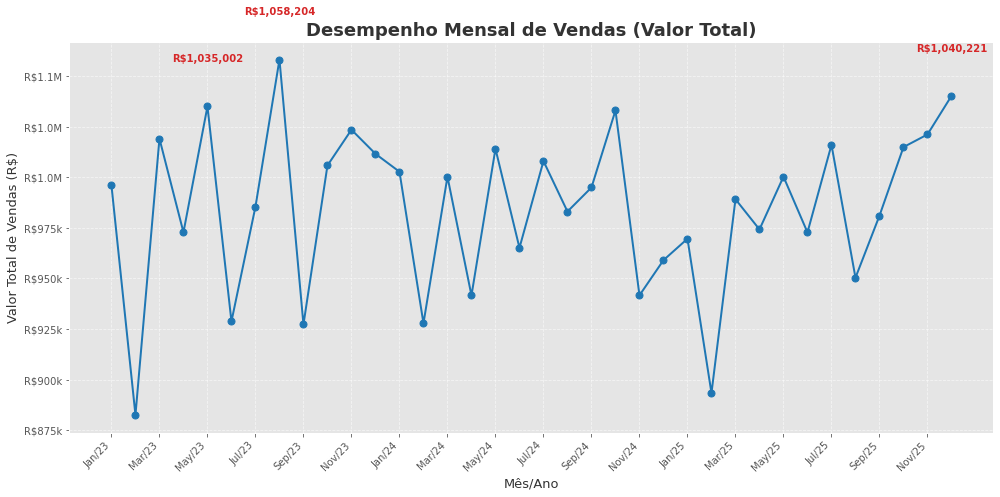

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter o desempenho mensal (retirado da sua VIEW)
SQL_QUERY = """
SELECT
    strftime('%Y-%m', venda_data) AS Mes_Ano, 
    SUM(venda_valor_total) AS Valor_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Mes_Ano
ORDER BY 
    Mes_Ano;
"""

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    # Se o erro for na conexão, pode ser que o caminho do DB esteja incorreto
    print(f"Verifique se o caminho '{DB_PATH}' está correto ou se o arquivo não tem extensão.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E VISUALIZAÇÃO CORRIGIDA ---

# Converte a coluna Mes_Ano para o tipo datetime
df['Mes_Ano'] = pd.to_datetime(df['Mes_Ano'])

# Cria um rótulo de mês abreviado para o eixo X
df['Mes_Label'] = df['Mes_Ano'].dt.strftime('%b/%y')

# --- PLOTAGEM DO GRÁFICO DE DESEMPENHO MENSAL (CORRIGIDO) ---
plt.style.use('ggplot') # <--- LINHA CORRIGIDA para um estilo padrão
plt.figure(figsize=(14, 7))

# Gráfico de linhas é ótimo para tendências temporais
plt.plot(df['Mes_Label'], df['Valor_Vendas_Totais'], 
         marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=7)

# Adiciona título e rótulos
plt.title('Desempenho Mensal de Vendas (Valor Total)', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Valor Total de Vendas (R$)', fontsize=13, color='#333333')

# Formatação do eixo Y (Milhões/Milhares)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'R${x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'R${x*1e-3:.0f}k'
    return f'R${x:.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))

# Destacar apenas os valores de pico (os 3 maiores)
top_sales = df.nlargest(3, 'Valor_Vendas_Totais')
for index, row in top_sales.iterrows():
    plt.text(row['Mes_Label'], row['Valor_Vendas_Totais'] + (df['Valor_Vendas_Totais'].max() * 0.02),
             f'R${row["Valor_Vendas_Totais"]:,.0f}',
             ha='center', va='bottom', fontsize=10, color='#d62728', weight='bold')

# Rótulos do Eixo X
n_labels = len(df['Mes_Label'])
if n_labels > 15:
    plt.xticks(df['Mes_Label'][::2], rotation=45, ha='right', fontsize=10, color='#555555')
else:
    plt.xticks(rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig('desempenho_vendas_mensal_corrigido.png')

print("✅ Gráfico corrigido e gerado com sucesso! Verifique o arquivo 'desempenho_vendas_mensal_corrigido.png'.")

✅ Gráfico do desempenho de vendas do ano 2025 gerado com sucesso! Verifique o arquivo 'desempenho_vendas_anual_completo.png'.


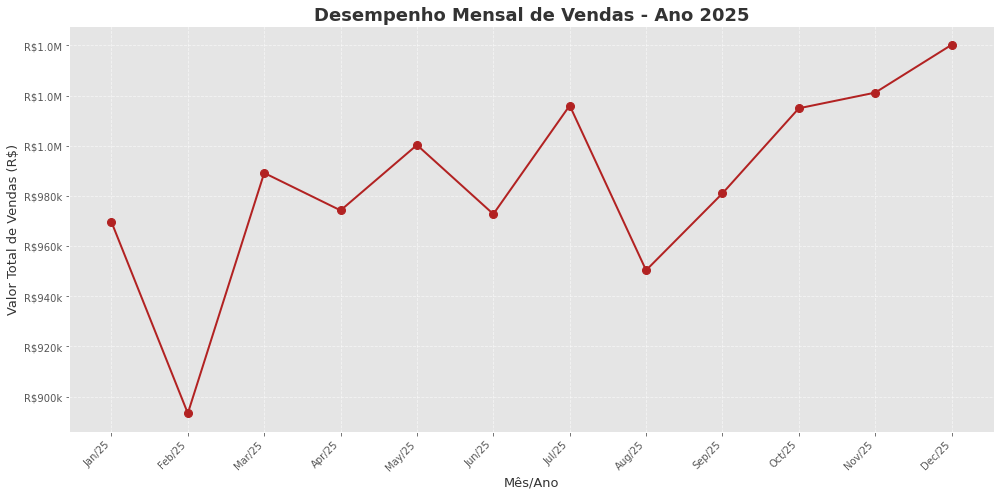

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter o desempenho mensal (retirado da sua VIEW)
SQL_QUERY = """
SELECT
    strftime('%Y-%m-%d', venda_data) AS Data_Completa, 
    SUM(venda_valor_total) AS Valor_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Data_Completa
ORDER BY 
    Data_Completa;
"""
# A query agrupa por dia, mas o filtro será feito por Mês/Ano no Python.

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    # read_sql_query executa a consulta e carrega o resultado diretamente em um DataFrame
    # Vou buscar por dia para garantir todos os registros antes de agregar por Mês no Python
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E FILTRAGEM (APENAS UM ANO) ---

# Converte a coluna para o tipo datetime
df['Data_Completa'] = pd.to_datetime(df['Data_Completa'])

# Agrega os dados em MÊS e ANO
df['Mes_Ano'] = df['Data_Completa'].dt.to_period('M')
df_mensal = df.groupby('Mes_Ano')['Valor_Vendas_Totais'].sum().reset_index()

# 1. Filtra o DataFrame para incluir APENAS O ANO MAIS RECENTE
latest_year = df_mensal['Mes_Ano'].max().year
df_filtrado = df_mensal[df_mensal['Mes_Ano'].dt.year == latest_year].copy()

# Cria um rótulo de mês abreviado para o eixo X
df_filtrado['Mes_Label'] = df_filtrado['Mes_Ano'].dt.strftime('%b/%y')


# --- PLOTAGEM DO GRÁFICO COM TODOS OS MESES ---
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# Gráfico de linhas é ótimo para tendências temporais
plt.plot(df_filtrado['Mes_Label'], df_filtrado['Valor_Vendas_Totais'], 
         marker='o', linestyle='-', color='#B22222', linewidth=2, markersize=8) # Verde escuro

# Adiciona título e rótulos
plt.title(f'Desempenho Mensal de Vendas - Ano {latest_year}', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Valor Total de Vendas (R$)', fontsize=13, color='#333333')

# Formatação do eixo Y (Milhões/Milhares)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'R${x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'R${x*1e-3:.0f}k'
    return f'R${x:.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))


# Rótulos do Eixo X: FORÇA A MOSTRAR TODOS OS MESES
plt.xticks(df_filtrado['Mes_Label'], rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig('desempenho_vendas_anual_completo.png')

print(f"✅ Gráfico do desempenho de vendas do ano {latest_year} gerado com sucesso! Verifique o arquivo 'desempenho_vendas_anual_completo.png'.")

Dados dos 10 funcionários de baixa performance carregados com sucesso.
Gráfico 'analise_baixa_performance_sqlite.png' salvo com sucesso.


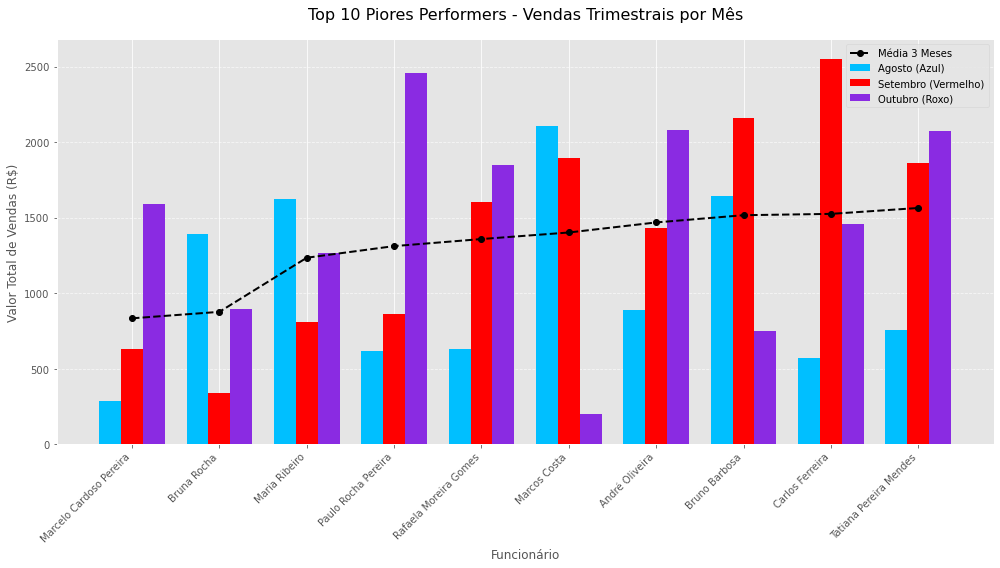

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 
import numpy as np

# --- Configuração do Banco de Dados ---
# Substitua 'seu_banco.db' pelo nome real do seu arquivo SQLite
DB_FILE = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj' 

def get_low_performers_data():
    """
    Conecta ao banco de dados SQLite e consulta a VIEW Baixa_Performance_Trimestral.
    A consulta busca os 10 funcionários com a menor média, 
    conforme definido na sua VIEW (apenas aqueles com vendas nos 3 meses).
    """
    conn = None
    df = pd.DataFrame()
    
    # A VIEW já faz a filtragem para "Media Ultimo 3 Meses" IS NOT NULL e a ordenação.
    # Aqui, apenas limitamos aos 10 primeiros.
    SQL_QUERY = """
    SELECT 
        "Nome do funcionário", 
        "Vendas em Agosto", 
        "Vendas em Setembro", 
        "Vendas em Outubro", 
        "Media Ultimo 3 Meses"
    FROM 
        Baixa_Performance_Trimestral
    LIMIT 10;
    """
    
    try:
        # Conecta ao arquivo SQLite
        conn = sqlite3.connect(DB_FILE)
        
        # Lê os dados da VIEW
        df = pd.read_sql_query(SQL_QUERY, conn)
        
        print(f"Dados dos 10 funcionários de baixa performance carregados com sucesso.")
        
    except sqlite3.Error as error:
        print(f"❌ Erro ao acessar o banco de dados SQLite: {error}")
        return pd.DataFrame()
        
    finally:
        if conn is not None:
            conn.close()
            
    return df

def plot_low_performance(df):
    """Gera um gráfico de barras agrupadas para demonstrar a baixa performance."""
    if df.empty:
        print("Não há dados para plotar.")
        return

    # Define o nome do funcionário como índice
    df.set_index('Nome do funcionário', inplace=True)
    
    fig, ax = plt.subplots(figsize=(14, 8))

    # Largura e posições das barras
    bar_width = 0.25
    r1 = np.arange(len(df))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plotagem das barras por mês
    ax.bar(r1, df['Vendas em Agosto'], color='#00bfff', width=bar_width, label='Agosto (Azul)')
    ax.bar(r2, df['Vendas em Setembro'], color='#ff0000', width=bar_width, label='Setembro (Vermelho)')
    ax.bar(r3, df['Vendas em Outubro'], color='#8a2be2', width=bar_width, label='Outubro (Roxo)') 

    # Adiciona a linha da Média de 3 Meses para referência
    ax.plot(r2, df['Media Ultimo 3 Meses'], color='black', marker='o', linestyle='--', linewidth=2, label='Média 3 Meses', zorder=5)

    # Configurações do Gráfico
    ax.set_title('Top 10 Piores Performers - Vendas Trimestrais por Mês', fontsize=16, pad=20)
    ax.set_xlabel('Funcionário', fontsize=12)
    ax.set_ylabel('Valor Total de Vendas (R$)', fontsize=12)
    ax.set_xticks([r + bar_width for r in range(len(df))])
    ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig('analise_baixa_performance_sqlite.png')
    print("Gráfico 'analise_baixa_performance_sqlite.png' salvo com sucesso.")


if __name__ == "__main__":
    performance_data = get_low_performers_data()
    plot_low_performance(performance_data)


Dados dos 10 funcionários de alta performance carregados com sucesso.
Gráfico 'analise_alta_performance_sqlite.png' salvo com sucesso.


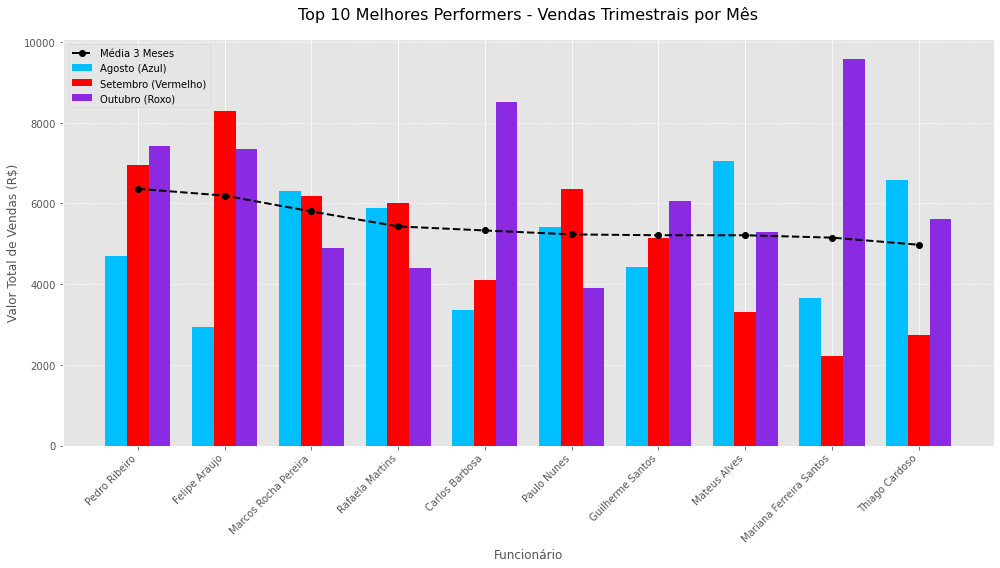

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 
import numpy as np

# --- Configuração do Banco de Dados ---
# Mantenha o caminho do seu arquivo de banco de dados
DB_FILE = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj' 

def get_high_performers_data():
    """
    Conecta ao banco de dados SQLite e consulta a VIEW Alta_Performance_Trimestral.
    A consulta busca os 10 funcionários com a maior média, 
    conforme definido na sua VIEW (apenas aqueles com vendas nos 3 meses).
    """
    conn = None
    df = pd.DataFrame()
    
    # CONSULTA À VIEW CORRIGIDA
    # A VIEW Alta_Performance_Trimestral já faz a filtragem e a ordenação DESC.
    SQL_QUERY = """
    SELECT 
        "Nome do funcionário", 
        "Vendas em Agosto", 
        "Vendas em Setembro", 
        "Vendas em Outubro", 
        "Media Ultimo 3 Meses"
    FROM 
        Alta_Performance_Trimestral
    LIMIT 10;
    """
    
    try:
        # Conecta ao arquivo SQLite
        conn = sqlite3.connect(DB_FILE)
        
        # Lê os dados da VIEW
        df = pd.read_sql_query(SQL_QUERY, conn)
        
        # MENSAGEM AJUSTADA
        print(f"Dados dos 10 funcionários de alta performance carregados com sucesso.")
        
    except sqlite3.Error as error:
        print(f"❌ Erro ao acessar o banco de dados SQLite: {error}")
        return pd.DataFrame()
        
    finally:
        if conn is not None:
            conn.close()
            
    return df

def plot_high_performance(df):
    """Gera um gráfico de barras agrupadas para demonstrar a alta performance."""
    if df.empty:
        print("Não há dados para plotar.")
        return

    # Define o nome do funcionário como índice
    df.set_index('Nome do funcionário', inplace=True)
    
    fig, ax = plt.subplots(figsize=(14, 8))

    # Largura e posições das barras
    bar_width = 0.25
    r1 = np.arange(len(df))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plotagem das barras por mês
    # As cores permanecem as mesmas para Agosto (Verde), Setembro (Laranja) e Outubro (Vermelho)
    ax.bar(r1, df['Vendas em Agosto'], color='#00bfff', width=bar_width, label='Agosto (Azul)')
    ax.bar(r2, df['Vendas em Setembro'], color='#ff0000', width=bar_width, label='Setembro (Vermelho)')
    ax.bar(r3, df['Vendas em Outubro'], color='#8a2be2', width=bar_width, label='Outubro (Roxo)') 


    # Adiciona a linha da Média de 3 Meses para referência
    ax.plot(r2, df['Media Ultimo 3 Meses'], color='black', marker='o', linestyle='--', linewidth=2, label='Média 3 Meses', zorder=5)

    # CONFIGURAÇÕES DO GRÁFICO AJUSTADAS
    ax.set_title('Top 10 Melhores Performers - Vendas Trimestrais por Mês', fontsize=16, pad=20)
    ax.set_xlabel('Funcionário', fontsize=12)
    ax.set_ylabel('Valor Total de Vendas (R$)', fontsize=12)
    ax.set_xticks([r + bar_width for r in range(len(df))])
    ax.set_xticklabels(df.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left')
    
    plt.tight_layout()
    # NOME DO ARQUIVO AJUSTADO
    plt.savefig('analise_alta_performance_sqlite.png')
    print("Gráfico 'analise_alta_performance_sqlite.png' salvo com sucesso.")


if __name__ == "__main__":
    performance_data = get_high_performers_data() # Chama a nova função
    plot_high_performance(performance_data) # O nome da função de plotagem também foi ajustado


Dados de 20 funcionários (Top 10 e Bottom 10) carregados com sucesso.
Gráfico 'analise_comparativa_top_bottom_sqlite.png' salvo com sucesso.


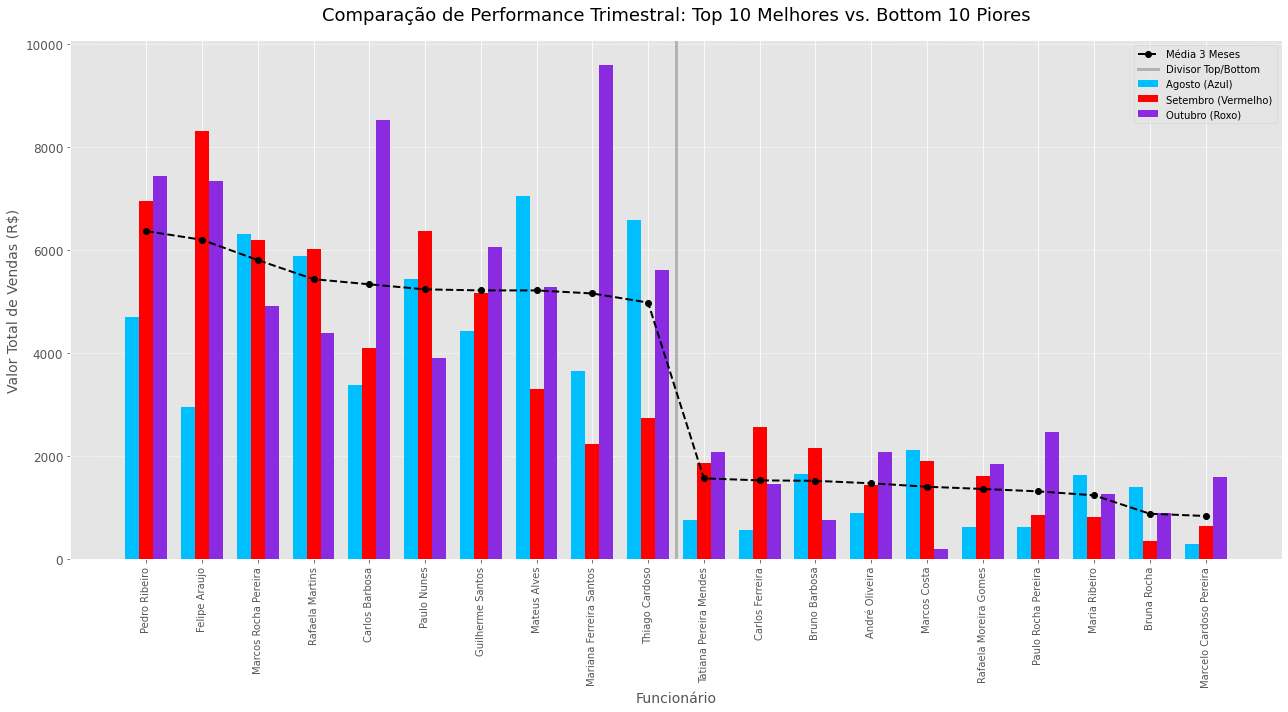

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 
import numpy as np

# --- Configuração do Banco de Dados ---
# Mantendo o caminho do seu arquivo de banco de dados
DB_FILE = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj' 

def get_top_bottom_data():
    """
    Conecta ao banco de dados SQLite, consulta as Views de Alta e Baixa Performance 
    (Top 10 e Bottom 10) e combina os resultados.
    """
    conn = None
    df_combined = pd.DataFrame()
    
    # Consulta 1: Top 10 Melhores Performers
    SQL_TOP = """
    SELECT 
        "Nome do funcionário", 
        "Vendas em Agosto", 
        "Vendas em Setembro", 
        "Vendas em Outubro", 
        "Media Ultimo 3 Meses"
    FROM Alta_Performance_Trimestral
    LIMIT 10;
    """
    
    # Consulta 2: Bottom 10 Piores Performers
    SQL_BOTTOM = """
    SELECT 
        "Nome do funcionário", 
        "Vendas em Agosto", 
        "Vendas em Setembro", 
        "Vendas em Outubro", 
        "Media Ultimo 3 Meses"
    FROM Baixa_Performance_Trimestral
    LIMIT 10;
    """
    
    try:
        conn = sqlite3.connect(DB_FILE)
        
        # 1. Obter os dados
        df_top = pd.read_sql_query(SQL_TOP, conn)
        df_bottom = pd.read_sql_query(SQL_BOTTOM, conn)

        # 2. Adicionar rótulos de grupo
        df_top['Performance_Group'] = 'Top 10 (Melhores)'
        df_bottom['Performance_Group'] = 'Bottom 10 (Piores)'

        # 3. Combinar e ordenar para visualização: 
        #    Top 10 (média alta) deve vir primeiro, Bottom 10 (média baixa) deve vir depois.
        df_combined = pd.concat([df_top, df_bottom])
        
        # Cria uma coluna temporária para ordenar corretamente: 
        # O Top 10 é ordenado por média DESC, e o Bottom 10 também por média DESC (para aparecer da melhor para a pior dentro do grupo inferior).
        df_combined['Sort_Key'] = df_combined.apply(
            lambda row: row['Media Ultimo 3 Meses'] if row['Performance_Group'] == 'Top 10 (Melhores)' else row['Media Ultimo 3 Meses'],
            axis=1
        )
        
        # Ordena primeiro pelo Grupo (Top antes do Bottom), e depois pela média decrescente.
        df_combined = df_combined.sort_values(
            by=['Performance_Group', 'Sort_Key'], 
            ascending=[False, False] # False para Top antes de Bottom, False para média decrescente
        ).drop(columns=['Sort_Key'])
        
        print(f"Dados de 20 funcionários (Top 10 e Bottom 10) carregados com sucesso.")
        
    except sqlite3.Error as error:
        print(f"❌ Erro ao acessar o banco de dados SQLite: {error}")
        return pd.DataFrame()
        
    finally:
        if conn is not None:
            conn.close()
            
    return df_combined

def plot_comparison(df):
    """Gera um gráfico de barras para comparar as vendas do Top 10 e Bottom 10."""
    if df.empty:
        print("Não há dados para plotar.")
        return

    df.set_index('Nome do funcionário', inplace=True)
    
    # Define o tamanho da figura para acomodar 20 barras (altura maior)
    fig_height = max(10, len(df) * 0.45) 
    fig, ax = plt.subplots(figsize=(18, fig_height)) 

    # Largura e posições das barras
    bar_width = 0.25
    r1 = np.arange(len(df))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plotagem das barras por mês (Cores fixas)
    ax.bar(r1, df['Vendas em Agosto'], color='#00bfff', width=bar_width, label='Agosto (Azul)')
    ax.bar(r2, df['Vendas em Setembro'], color='#ff0000', width=bar_width, label='Setembro (Vermelho)')
    ax.bar(r3, df['Vendas em Outubro'], color='#8a2be2', width=bar_width, label='Outubro (Roxo)') 


    # Adiciona a linha da Média de 3 Meses para referência
    ax.plot(r2, df['Media Ultimo 3 Meses'], color='black', marker='o', linestyle='--', linewidth=2, label='Média 3 Meses', zorder=5)

    # Adicionar linha divisória vertical entre os grupos (entre a barra 10 e 11)
    if len(df) == 20:
        ax.axvline(x=9.5 + bar_width, color='gray', linestyle='-', linewidth=3, alpha=0.5, label='Divisor Top/Bottom')

    # CONFIGURAÇÕES DO GRÁFICO
    ax.set_title('Comparação de Performance Trimestral: Top 10 Melhores vs. Bottom 10 Piores', fontsize=18, pad=20)
    ax.set_xlabel('Funcionário', fontsize=14)
    ax.set_ylabel('Valor Total de Vendas (R$)', fontsize=14)
    
    ax.set_xticks([r + bar_width for r in range(len(df))])
    ax.set_xticklabels(df.index, rotation=90, ha='center', fontsize=10) # Rotação de 90 graus para evitar sobreposição
    ax.tick_params(axis='y', labelsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.savefig('analise_comparativa_top_bottom_sqlite.png')
    print("Gráfico 'analise_comparativa_top_bottom_sqlite.png' salvo com sucesso.")


if __name__ == "__main__":
    comparison_data = get_top_bottom_data()
    plot_comparison(comparison_data)



✅ Gráfico do desempenho de QUANTIDADE de vendas do ano 2025 gerado com sucesso! Verifique o arquivo 'desempenho_quantidade_mensal.png'.


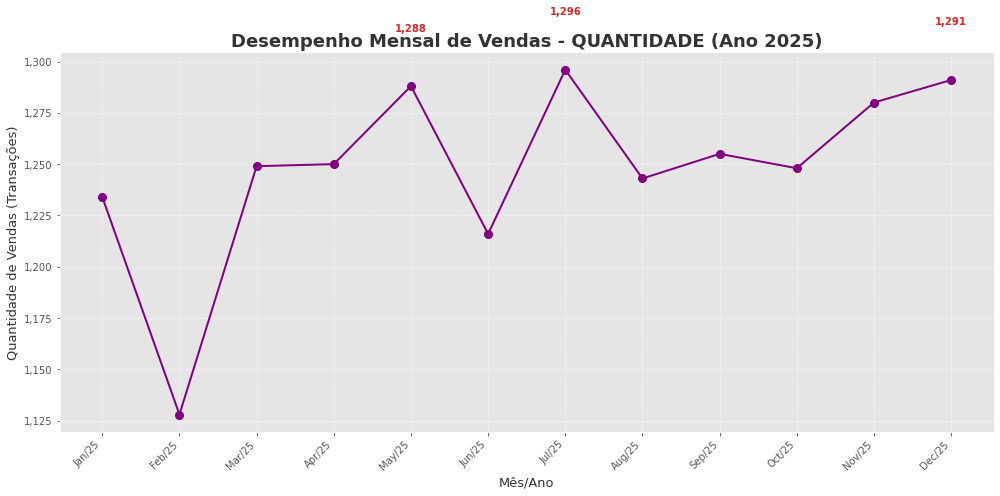

In [42]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter a QUANTIDADE de vendas mensais
SQL_QUERY = """
SELECT
    strftime('%Y-%m-%d', venda_data) AS Data_Completa, 
    COUNT(venda_id) AS Qntd_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Data_Completa
ORDER BY 
    Data_Completa;
"""
# A query agrupa por dia, e o filtro e agregação por Mês/Ano será feito no Python

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    # read_sql_query executa a consulta e carrega o resultado diretamente em um DataFrame
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E FILTRAGEM (APENAS UM ANO) ---

# Converte a coluna para o tipo datetime
df['Data_Completa'] = pd.to_datetime(df['Data_Completa'])

# Agrega os dados em MÊS e ANO
df['Mes_Ano'] = df['Data_Completa'].dt.to_period('M')
df_mensal = df.groupby('Mes_Ano')['Qntd_Vendas_Totais'].sum().reset_index()

# 1. Filtra o DataFrame para incluir APENAS O ANO MAIS RECENTE
latest_year = df_mensal['Mes_Ano'].max().year
df_filtrado = df_mensal[df_mensal['Mes_Ano'].dt.year == latest_year].copy()

# Cria um rótulo de mês abreviado para o eixo X
df_filtrado['Mes_Label'] = df_filtrado['Mes_Ano'].dt.strftime('%b/%y')


# --- PLOTAGEM DO GRÁFICO COM TODOS OS MESES ---
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# Gráfico de linhas para Quantidade
plt.plot(df_filtrado['Mes_Label'], df_filtrado['Qntd_Vendas_Totais'], 
         marker='o', linestyle='-', color='#800080', linewidth=2, markersize=8) # Roxo

# Adiciona título e rótulos
plt.title(f'Desempenho Mensal de Vendas - QUANTIDADE (Ano {latest_year})', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Quantidade de Vendas (Transações)', fontsize=13, color='#333333')

# Formatação do eixo Y (apenas números inteiros)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Destacar apenas os valores de pico (os 3 maiores)
top_counts = df_filtrado.nlargest(3, 'Qntd_Vendas_Totais')
for index, row in top_counts.iterrows():
    # Rótulo de texto mais compacto
    plt.text(row['Mes_Label'], row['Qntd_Vendas_Totais'] + (df_filtrado['Qntd_Vendas_Totais'].max() * 0.02),
             f'{row["Qntd_Vendas_Totais"]:,.0f}',
             ha='center', va='bottom', fontsize=10, color='#d62728', weight='bold')

# Rótulos do Eixo X: FORÇA A MOSTRAR TODOS OS MESES
plt.xticks(df_filtrado['Mes_Label'], rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig('desempenho_quantidade_mensal.png')

print(f"✅ Gráfico do desempenho de QUANTIDADE de vendas do ano {latest_year} gerado com sucesso! Verifique o arquivo 'desempenho_quantidade_mensal.png'.")

✅ Gráfico do desempenho de QUANTIDADE de vendas para o ano 2024 gerado com sucesso! Verifique o arquivo 'desempenho_quantidade_2024.png'.


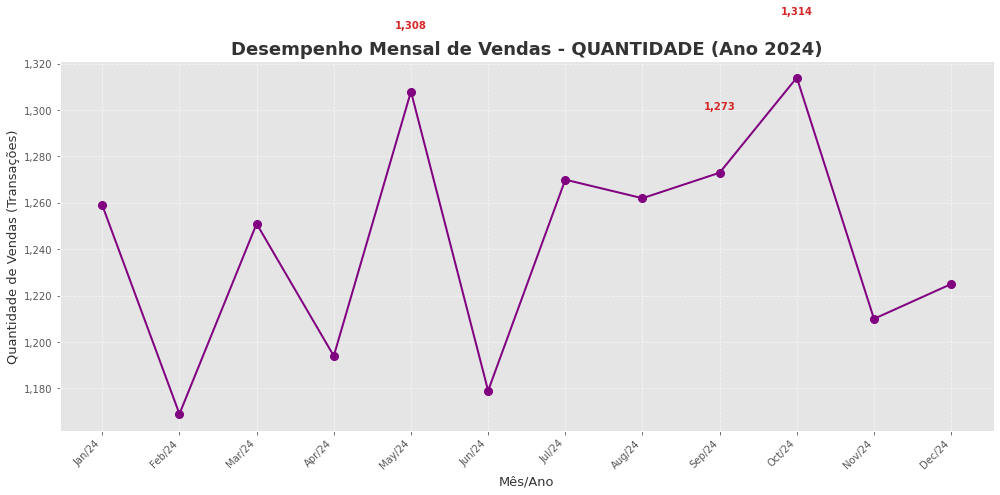

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter a QUANTIDADE de vendas mensais (dados por dia)
SQL_QUERY = """
SELECT
    strftime('%Y-%m-%d', venda_data) AS Data_Completa, 
    COUNT(venda_id) AS Qntd_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Data_Completa
ORDER BY 
    Data_Completa;
"""
# A query agrupa por dia, e o filtro e agregação por Mês/Ano será feito no Python

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    # read_sql_query executa a consulta e carrega o resultado diretamente em um DataFrame
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E FILTRAGEM (ANO FIXO: 2024) ---

# Converte a coluna para o tipo datetime
df['Data_Completa'] = pd.to_datetime(df['Data_Completa'])

# Agrega os dados em MÊS e ANO
df['Mes_Ano'] = df['Data_Completa'].dt.to_period('M')
df_mensal = df.groupby('Mes_Ano')['Qntd_Vendas_Totais'].sum().reset_index()

# 1. Filtra o DataFrame para incluir APENAS O ANO ALVO (2024)
target_year = 2024
df_filtrado = df_mensal[df_mensal['Mes_Ano'].dt.year == target_year].copy()

# Se não houver dados para o ano alvo
if df_filtrado.empty:
    print(f"Não foram encontrados dados de vendas para o ano {target_year} após a filtragem.")
    exit()

# Cria um rótulo de mês abreviado para o eixo X
df_filtrado['Mes_Label'] = df_filtrado['Mes_Ano'].dt.strftime('%b/%y')


# --- PLOTAGEM DO GRÁFICO COM TODOS OS MESES ---
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# Gráfico de linhas para Quantidade
plt.plot(df_filtrado['Mes_Label'], df_filtrado['Qntd_Vendas_Totais'], 
         marker='o', linestyle='-', color='#800080', linewidth=2, markersize=8) # Roxo

# Adiciona título e rótulos
plt.title(f'Desempenho Mensal de Vendas - QUANTIDADE (Ano {target_year})', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Quantidade de Vendas (Transações)', fontsize=13, color='#333333')

# Formatação do eixo Y (apenas números inteiros)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Destacar apenas os valores de pico (os 3 maiores)
top_counts = df_filtrado.nlargest(3, 'Qntd_Vendas_Totais')
for index, row in top_counts.iterrows():
    # Rótulo de texto mais compacto
    plt.text(row['Mes_Label'], row['Qntd_Vendas_Totais'] + (df_filtrado['Qntd_Vendas_Totais'].max() * 0.02),
             f'{row["Qntd_Vendas_Totais"]:,.0f}',
             ha='center', va='bottom', fontsize=10, color='#d62728', weight='bold')

# Rótulos do Eixo X: FORÇA A MOSTRAR TODOS OS MESES
plt.xticks(df_filtrado['Mes_Label'], rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig(f'desempenho_quantidade_2024.png')

print(f"✅ Gráfico do desempenho de QUANTIDADE de vendas para o ano {target_year} gerado com sucesso! Verifique o arquivo 'desempenho_quantidade_2024.png'.")

✅ Gráfico do desempenho de VALOR TOTAL de vendas para o ano 2024 gerado com sucesso! Verifique o arquivo 'desempenho_valor_2024.png'.


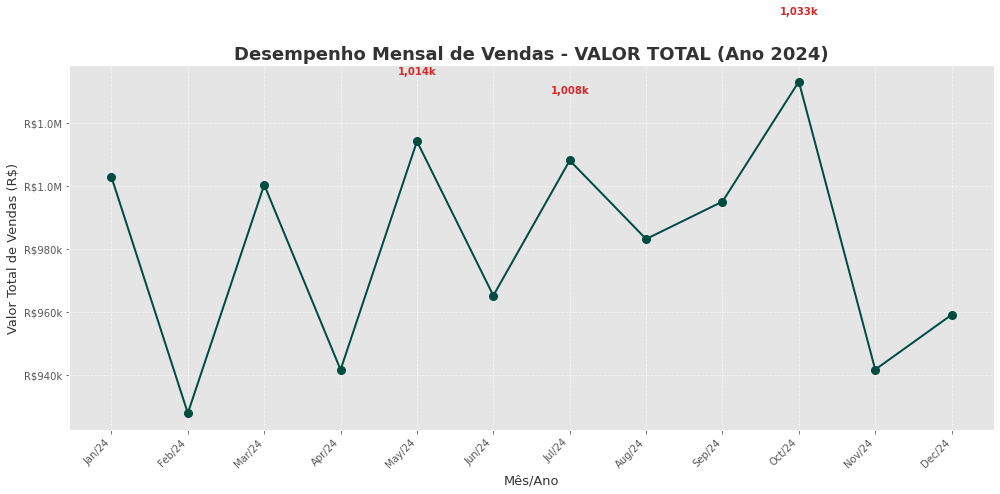

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter o VALOR TOTAL de vendas mensais (dados por dia)
SQL_QUERY = """
SELECT
    strftime('%Y-%m-%d', venda_data) AS Data_Completa, 
    SUM(venda_valor_total) AS Valor_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Data_Completa
ORDER BY 
    Data_Completa;
"""
# A query agrupa por dia, e o filtro e agregação por Mês/Ano será feito no Python

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    # read_sql_query executa a consulta e carrega o resultado diretamente em um DataFrame
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E FILTRAGEM (ANO FIXO: 2024) ---

# Converte a coluna para o tipo datetime
df['Data_Completa'] = pd.to_datetime(df['Data_Completa'])

# Agrega os dados em MÊS e ANO
df['Mes_Ano'] = df['Data_Completa'].dt.to_period('M')
df_mensal = df.groupby('Mes_Ano')['Valor_Vendas_Totais'].sum().reset_index()

# 1. Filtra o DataFrame para incluir APENAS O ANO ALVO (2024)
target_year = 2024
df_filtrado = df_mensal[df_mensal['Mes_Ano'].dt.year == target_year].copy()

# Se não houver dados para o ano alvo
if df_filtrado.empty:
    print(f"Não foram encontrados dados de vendas para o ano {target_year} após a filtragem.")
    exit()

# Cria um rótulo de mês abreviado para o eixo X
df_filtrado['Mes_Label'] = df_filtrado['Mes_Ano'].dt.strftime('%b/%y')


# --- PLOTAGEM DO GRÁFICO COM TODOS OS MESES ---
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# Gráfico de linhas para Valor Total
plt.plot(df_filtrado['Mes_Label'], df_filtrado['Valor_Vendas_Totais'], 
         marker='o', linestyle='-', color='#004d40', linewidth=2, markersize=8) # Verde Escuro/Azul Marinho

# Adiciona título e rótulos
plt.title(f'Desempenho Mensal de Vendas - VALOR TOTAL (Ano {target_year})', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Valor Total de Vendas (R$)', fontsize=13, color='#333333')

# Formatação do eixo Y (Milhões/Milhares)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'R${x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'R${x*1e-3:.0f}k'
    return f'R${x:.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))

# Destacar apenas os valores de pico (os 3 maiores)
top_sales = df_filtrado.nlargest(3, 'Valor_Vendas_Totais')
for index, row in top_sales.iterrows():
    # Rótulo de texto mais compacto
    # Usando o mesmo formatter de milhares do eixo Y, mas sem o 'R$'
    display_value = f'{row["Valor_Vendas_Totais"]/1000:,.0f}k' if row["Valor_Vendas_Totais"] >= 1e3 else f'{row["Valor_Vendas_Totais"]:,.0f}'
    
    plt.text(row['Mes_Label'], row['Valor_Vendas_Totais'] + (df_filtrado['Valor_Vendas_Totais'].max() * 0.02),
             display_value,
             ha='center', va='bottom', fontsize=10, color='#d62728', weight='bold')

# Rótulos do Eixo X: FORÇA A MOSTRAR TODOS OS MESES
plt.xticks(df_filtrado['Mes_Label'], rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig(f'desempenho_valor_2024.png')

print(f"✅ Gráfico do desempenho de VALOR TOTAL de vendas para o ano {target_year} gerado com sucesso! Verifique o arquivo 'desempenho_valor_2024.png'.")

✅ Gráfico do desempenho de VALOR TOTAL de vendas para o ano 2024 gerado com sucesso! Verifique o arquivo 'desempenho_valor_2024.png'.


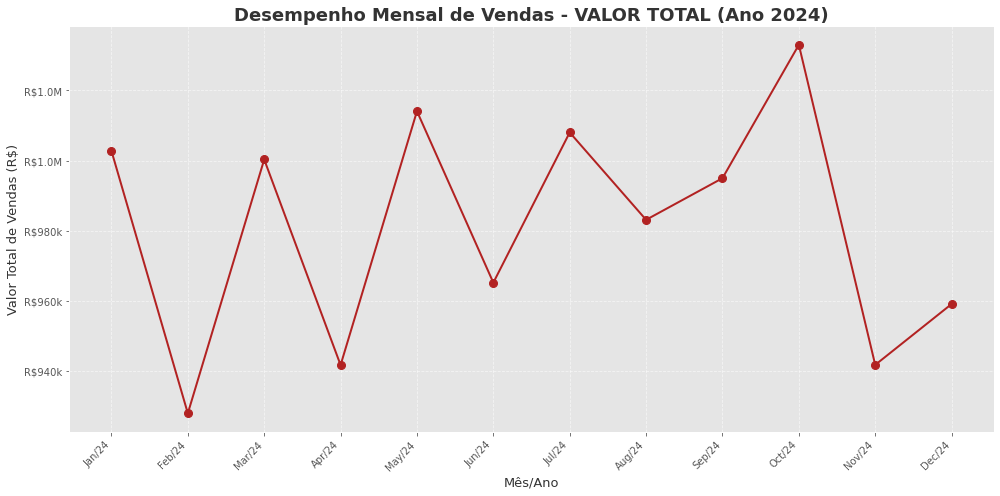

In [48]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter o VALOR TOTAL de vendas mensais (dados por dia)
SQL_QUERY = """
SELECT
    strftime('%Y-%m-%d', venda_data) AS Data_Completa, 
    SUM(venda_valor_total) AS Valor_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Data_Completa
ORDER BY 
    Data_Completa;
"""
# A query agrupa por dia, e o filtro e agregação por Mês/Ano será feito no Python

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    # read_sql_query executa a consulta e carrega o resultado diretamente em um DataFrame
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E FILTRAGEM (ANO FIXO: 2024) ---

# Converte a coluna para o tipo datetime
df['Data_Completa'] = pd.to_datetime(df['Data_Completa'])

# Agrega os dados em MÊS e ANO
df['Mes_Ano'] = df['Data_Completa'].dt.to_period('M')
df_mensal = df.groupby('Mes_Ano')['Valor_Vendas_Totais'].sum().reset_index()

# 1. Filtra o DataFrame para incluir APENAS O ANO ALVO (2024)
target_year = 2024 # FIXADO EM 2024
df_filtrado = df_mensal[df_mensal['Mes_Ano'].dt.year == target_year].copy()

# Se não houver dados para o ano alvo
if df_filtrado.empty:
    print(f"Não foram encontrados dados de vendas para o ano {target_year} após a filtragem.")
    exit()

# Cria um rótulo de mês abreviado para o eixo X
df_filtrado['Mes_Label'] = df_filtrado['Mes_Ano'].dt.strftime('%b/%y')


# --- PLOTAGEM DO GRÁFICO COM TODOS OS MESES ---
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# Gráfico de linhas para Valor Total
plt.plot(df_filtrado['Mes_Label'], df_filtrado['Valor_Vendas_Totais'], 
         marker='o', linestyle='-', color='#B22222', linewidth=2, markersize=8) # Cor Verde Escuro

# Adiciona título e rótulos
plt.title(f'Desempenho Mensal de Vendas - VALOR TOTAL (Ano {target_year})', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Valor Total de Vendas (R$)', fontsize=13, color='#333333')

# Formatação do eixo Y (Milhões/Milhares)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'R${x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'R${x*1e-3:.0f}k'
    return f'R${x:.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))


# Rótulos do Eixo X: FORÇA A MOSTRAR TODOS OS MESES
plt.xticks(df_filtrado['Mes_Label'], rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig(f'desempenho_valor_2024.png')

print(f"✅ Gráfico do desempenho de VALOR TOTAL de vendas para o ano {target_year} gerado com sucesso! Verifique o arquivo 'desempenho_valor_2024.png'.")

✅ Gráfico do desempenho de VALOR TOTAL de vendas para o ano 2024 gerado com sucesso! Verifique o arquivo 'desempenho_valor_2024.png'.


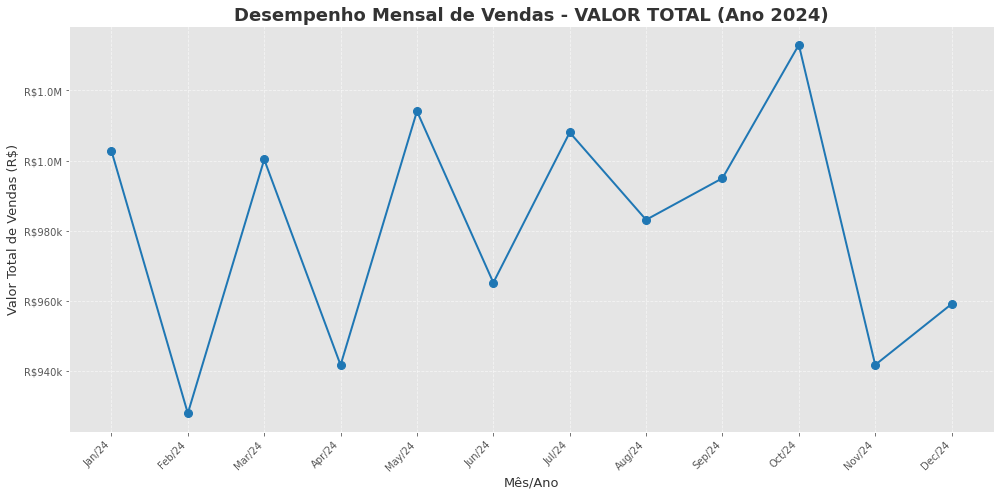

In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter o VALOR TOTAL de vendas mensais (dados por dia)
SQL_QUERY = """
SELECT
    strftime('%Y-%m-%d', venda_data) AS Data_Completa, 
    SUM(venda_valor_total) AS Valor_Vendas_Totais
FROM 
    Venda
GROUP BY 
    Data_Completa
ORDER BY 
    Data_Completa;
"""
# A query agrupa por dia, e o filtro e agregação por Mês/Ano será feito no Python

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    # read_sql_query executa a consulta e carrega o resultado diretamente em um DataFrame
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto.")
    exit()

# Caso não haja dados na tabela Venda
if df.empty:
    print("A consulta não retornou dados. Verifique se a tabela 'Venda' está preenchida.")
    exit()

# --- ETAPA 2: PRÉ-PROCESSAMENTO E FILTRAGEM (ANO FIXO: 2024) ---

# Converte a coluna para o tipo datetime
df['Data_Completa'] = pd.to_datetime(df['Data_Completa'])

# Agrega os dados em MÊS e ANO
df['Mes_Ano'] = df['Data_Completa'].dt.to_period('M')
df_mensal = df.groupby('Mes_Ano')['Valor_Vendas_Totais'].sum().reset_index()

# 1. Filtra o DataFrame para incluir APENAS O ANO ALVO (2024)
target_year = 2024 # FIXADO EM 2024
df_filtrado = df_mensal[df_mensal['Mes_Ano'].dt.year == target_year].copy()

# Se não houver dados para o ano alvo
if df_filtrado.empty:
    print(f"Não foram encontrados dados de vendas para o ano {target_year} após a filtragem.")
    exit()

# Cria um rótulo de mês abreviado para o eixo X
df_filtrado['Mes_Label'] = df_filtrado['Mes_Ano'].dt.strftime('%b/%y')


# --- PLOTAGEM DO GRÁFICO COM TODOS OS MESES ---
plt.style.use('ggplot') 
plt.figure(figsize=(14, 7))

# Gráfico de linhas para Valor Total
plt.plot(df_filtrado['Mes_Label'], df_filtrado['Valor_Vendas_Totais'], 
         marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8) # Cor Verde Escuro

# Adiciona título e rótulos
plt.title(f'Desempenho Mensal de Vendas - VALOR TOTAL (Ano {target_year})', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=13, color='#333333')
plt.ylabel('Valor Total de Vendas (R$)', fontsize=13, color='#333333')

# Formatação do eixo Y (Milhões/Milhares)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'R${x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'R${x*1e-3:.0f}k'
    return f'R${x:.0f}'

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))


# Rótulos do Eixo X: FORÇA A MOSTRAR TODOS OS MESES
plt.xticks(df_filtrado['Mes_Label'], rotation=45, ha='right', fontsize=10, color='#555555')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig(f'desempenho_valor_2024.png')

print(f"✅ Gráfico do desempenho de VALOR TOTAL de vendas para o ano {target_year} gerado com sucesso! Verifique o arquivo 'desempenho_valor_2024.png'.")

In [53]:
import sqlite3
import pandas as pd

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# 1. SQL para obter o Ranking de Top 100 Clientes (usando sua VIEW)
SQL_TOP_CLIENTES = """
SELECT 
    Nome_Do_Cliente, 
    Valor_Total_Gasto_Pelo_Cliente
FROM 
    Sorteio_Melhores_Clientes;
"""

# 2. SQL para obter o Valor Total de Vendas (Receita Total)
SQL_RECEITA_TOTAL = """
SELECT 
    SUM(venda_valor_total) AS Receita_Total
FROM 
    Venda;
"""

# Função para formatar valores como moeda BRL
def formatar_moeda(valor):
    # Formata R$ X.XXX,XX
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    
    # Carrega Top Clientes
    df_top = pd.read_sql_query(SQL_TOP_CLIENTES, sqliteConnection)
    
    # Carrega Receita Total
    df_total = pd.read_sql_query(SQL_RECEITA_TOTAL, sqliteConnection)
    
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print(f"Verifique se o caminho '{DB_PATH}' está correto ou se a VIEW foi criada.")
    exit()

# Validação de dados
if df_top.empty or df_total.empty:
    print("Erro: Dados de Top Clientes ou Receita Total não puderam ser carregados.")
    exit()

# --- ETAPA 2: CÁLCULOS E ANÁLISE ---

# Top 10 para o slide
df_top10 = df_top.head(10).copy()

# Valor Total Gasto pelo Top 10
valor_top10 = df_top10['Valor_Total_Gasto_Pelo_Cliente'].sum()

# Receita Total
receita_total = df_total.iloc[0]['Receita_Total'] if not df_total.empty else 0

# Porcentagem que o Top 10 representa na Receita Total
percentual_top10 = (valor_top10 / receita_total) * 100 if receita_total > 0 else 0

# Total de Clientes na base (estimativa, se precisar do 0.XX% do Insight Chave)
# Você precisaria de uma query adicional para COUNT(DISTINCT cli_id) na tabela Cliente

# --- ETAPA 3: GERAÇÃO DO SLIDE EM FORMATO TEXTO/MARKDOWN ---

output = f"""
# ANÁLISE DE CLIENTES VIP (FORMATO SLIDE)

## 🏆 TOP 10 CLIENTES POR VALOR GASTO

| Ranking | Nome do Cliente | Valor Total Gasto | Contribuição na Receita Total |
| :---: | :--- | :---: | :---: |
"""

# Preenche a tabela com os dados do Top 10
for i, row in df_top10.iterrows():
    # Calcula a contribuição individual no Top 10 (para preencher a coluna do slide)
    contribuicao_top10 = (row['Valor_Total_Gasto_Pelo_Cliente'] / valor_top10) * 100 if valor_top10 > 0 else 0
    
    output += f"| {i+1}º | {row['Nome_Do_Cliente']} | {formatar_moeda(row['Valor_Total_Gasto_Pelo_Cliente'])} | {contribuicao_top10:.1f}% | \n"

output += f"""
| **TOTAL** | | **{formatar_moeda(valor_top10)}** | **100,0%** |

---
## 💡 INSIGHT CHAVE: REGRA DE PARETO

- **Métrica Essencial:** O Valor Total gasto pelo Top 10 Clientes é de **{formatar_moeda(valor_top10)}**.

- **Impacto no Negócio:** Estes 10 clientes são responsáveis por **{percentual_top10:.2f}% da sua Receita Total** no período analisado.

- **Conclusão:** O foco em programas de retenção e fidelidade para este grupo deve ser a **prioridade número 1** para estabilidade da receita.
"""

# Imprime o resultado formatado
print(output)

# Opcional: Salvar em um arquivo de texto limpo se preferir
with open('analise_clientes_slide.txt', 'w', encoding='utf-8') as f:
    f.write(output)

print("✅ Análise de Pareto em formato texto salva em 'analise_clientes_slide.txt' (e exibida acima).")


# ANÁLISE DE CLIENTES VIP (FORMATO SLIDE)

## 🏆 TOP 10 CLIENTES POR VALOR GASTO

| Ranking | Nome do Cliente | Valor Total Gasto | Contribuição na Receita Total |
| :---: | :--- | :---: | :---: |
| 1º | Paulo Martins | R$ 10.995,38 | 10.5% | 
| 2º | Mariana Barbosa | R$ 10.992,56 | 10.5% | 
| 3º | Aline Rodrigues Martins | R$ 10.630,20 | 10.1% | 
| 4º | Marcos Silva | R$ 10.621,92 | 10.1% | 
| 5º | Lucas Mendes | R$ 10.468,65 | 10.0% | 
| 6º | Tatiana Oliveira Pereira | R$ 10.384,74 | 9.9% | 
| 7º | Tatiana Alves | R$ 10.315,18 | 9.8% | 
| 8º | Paulo Rocha | R$ 10.273,23 | 9.8% | 
| 9º | Letícia Nunes | R$ 10.136,52 | 9.7% | 
| 10º | Ana Santos | R$ 10.108,91 | 9.6% | 

| **TOTAL** | | **R$ 104.927,29** | **100,0%** |

---
## 💡 INSIGHT CHAVE: REGRA DE PARETO

- **Métrica Essencial:** O Valor Total gasto pelo Top 10 Clientes é de **R$ 104.927,29**.

- **Impacto no Negócio:** Estes 10 clientes são responsáveis por **0.30% da sua Receita Total** no período analisado.

- **Conclusão:** O 

In [54]:
import sqlite3

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
# ⚠️ GARANTA QUE ESTE CAMINHO ESTÁ CORRETO NO SEU COMPUTADOR!
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para consultar a VIEW
SQL_QUERY = """
SELECT 
    Nome_Do_Cliente, 
    Valor_Total_Gasto_Pelo_Cliente
FROM 
    Sorteio_Melhores_Clientes;
"""

def formatar_moeda(valor):
    """Formata um número para a moeda brasileira (R$)."""
    if valor is None:
        return "R$ 0,00"
    return f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# --- EXECUÇÃO E EXIBIÇÃO ---
print(f"\n{'='*70}")
print("           Ranking de Clientes (Baseado em Compras de 2025)")
print(f"{'='*70}")

try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    cursor = sqliteConnection.cursor()
    
    # Executa a consulta
    cursor.execute(SQL_QUERY)
    
    # Obtém todos os resultados
    resultados = cursor.fetchall()
    
    if not resultados:
        print("Nenhum cliente encontrado. Verifique o período (2025) ou a tabela Venda.")
    else:
        # Tabela formatada
        print(f"{'POS':<4} | {'NOME DO CLIENTE':<40} | {'VALOR TOTAL GASTO':<20}")
        print(f"{'-'*4:<4} + {'-'*40:<40} + {'-'*20:<20}")
        
        for i, (nome, valor) in enumerate(resultados):
            posicao = i + 1
            valor_formatado = formatar_moeda(valor)
            
            # Limita o nome para caber na tabela
            nome_display = nome[:40] if len(nome) > 40 else nome
            
            print(f"{posicao:<4} | {nome_display:<40} | {valor_formatado:<20}")
            
    # Fecha a conexão
    sqliteConnection.close()

except sqlite3.OperationalError as e:
    # Captura erro se a VIEW não existir ou a query estiver errada
    print(f"\nERRO OPERACIONAL SQL: {e}")
    print("Certifique-se de que a VIEW 'Sorteio_Melhores_Clientes' foi criada corretamente no seu banco de dados.")
    
except sqlite3.Error as e:
    # Captura outros erros de conexão
    print(f"\nERRO DE CONEXÃO: {e}")
    print(f"Verifique se o caminho do DB '{DB_PATH}' está correto.")
    
finally:
    print(f"\n{'='*70}")


           Ranking de Clientes (Baseado em Compras de 2025)
POS  | NOME DO CLIENTE                          | VALOR TOTAL GASTO   
---- + ---------------------------------------- + --------------------
1    | Bruno Araujo                             | R$ 6.838,95         
2    | Mariana Pereira                          | R$ 6.795,74         
3    | Camila Souza                             | R$ 6.466,89         
4    | Eduardo Moreira Silva                    | R$ 6.391,27         
5    | Sofia Ferreira                           | R$ 6.348,18         
6    | André Silva                              | R$ 6.217,71         
7    | Gabriel Oliveira                         | R$ 6.087,92         
8    | Pedro Ribeiro                            | R$ 5.878,40         
9    | Thiago Costa                             | R$ 5.795,28         
10   | Ana Araujo Gomes                         | R$ 5.741,35         
11   | Gabriel Lima                             | R$ 5.666,79         
12   | Maria Bar

✅ Gráfico de Ranking das Categorias Mais Vendidas gerado com sucesso! Verifique o arquivo 'ranking_categorias_vendidas.png'.


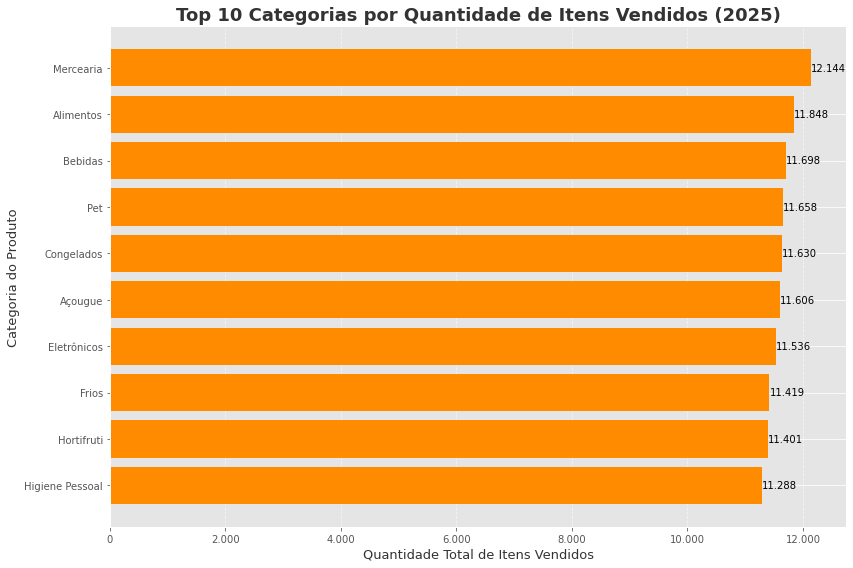

In [55]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- CONFIGURAÇÃO DO BANCO DE DADOS ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'

# SQL para obter o Ranking de Categorias por Quantidade Vendida no período de 2025
# A query utiliza a coluna corrigida 'p.prod_catp_id'
SQL_QUERY = """
SELECT
    cp.catp_nome AS Categoria_Do_Produto,
    SUM(iv.itemv_qtd) AS Qntd_Vendida_Total 
FROM Item_Venda iv
JOIN Venda v ON iv.itemv_venda_id = v.venda_id
JOIN Produto p ON iv.itemv_prod_id = p.prod_id
-- Assumindo que a coluna na tabela Produto é 'prod_catp_id'
JOIN Categoria_Produto cp ON cp.catp_id = p.prod_catp_id 
WHERE v.venda_data BETWEEN '2025-01-01' AND '2025-11-13'
GROUP BY
    Categoria_Do_Produto
ORDER BY
    Qntd_Vendida_Total DESC
LIMIT 10;
"""

# --- ETAPA 1: CONEXÃO E CARREGAMENTO DE DADOS ---
try:
    sqliteConnection = sqlite3.connect(DB_PATH)
    
    # read_sql_query executa a consulta e carrega o resultado
    df = pd.read_sql_query(SQL_QUERY, sqliteConnection)
    
    sqliteConnection.close()

except sqlite3.Error as e:
    print(f"Erro ao conectar ou executar a query no banco de dados: {e}")
    print("Verifique se o caminho do DB está correto e se a coluna 'prod_catp_id' existe na tabela 'Produto'.")
    exit()

# Validação de dados
if df.empty:
    print("A consulta não retornou dados. Verifique se há vendas no período de 2025.")
    exit()

# --- ETAPA 2: PLOTAGEM DO GRÁFICO ---

# Prepara os dados para o gráfico horizontal (ordem crescente para o maior ficar no topo)
df = df.sort_values(by='Qntd_Vendida_Total', ascending=True)

plt.style.use('ggplot') 
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontal
bars = plt.barh(df['Categoria_Do_Produto'], df['Qntd_Vendida_Total'], 
                color='#FF8C00') # Laranja escuro para destaque

# Adiciona título e rótulos
plt.title('Top 10 Categorias por Quantidade de Itens Vendidos (2025)', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Quantidade Total de Itens Vendidos', fontsize=13, color='#333333')
plt.ylabel('Categoria do Produto', fontsize=13, color='#333333')

# Formatação do eixo X (números inteiros com separador de milhar)
def integer_formatter(x, pos):
    if x >= 1e3:
        return f'{x:,.0f}'.replace(',', '.')
    return f'{x:.0f}'

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(integer_formatter))

# Adiciona os valores em cima de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:,.0f}'.replace(',', '.'), # Formata o valor
             ha='left', va='center', fontsize=10, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Salva o gráfico
plt.savefig('ranking_categorias_vendidas.png')

print("✅ Gráfico de Ranking das Categorias Mais Vendidas gerado com sucesso! Verifique o arquivo 'ranking_categorias_vendidas.png'.")

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Configuração de Dados ---
DB_PATH = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'
VIEW_NAME = 'Valor_Vendas_Mensais'

# --- 1. Carregamento de Dados da VIEW ---
try:
    conn = sqlite3.connect(DB_PATH)
    SQL_QUERY = f'SELECT * FROM {VIEW_NAME}'
    df = pd.read_sql_query(SQL_QUERY, conn)
    conn.close()

except sqlite3.Error as e:
    print(f"❌ Erro ao conectar ou executar a query: {e}")
    print(f"Verifique o caminho do banco: '{DB_PATH}' e se a VIEW '{VIEW_NAME}' existe.")
    exit()

if df.empty:
    print("A VIEW não retornou dados.")
    exit()

# --- 2. Preparação dos Dados ---

# Garante que Mes_Ano é um tipo de período para ordenação correta
df['Mes_Ano'] = pd.to_datetime(df['Mes_Ano']).dt.to_period('M')

# Cria um label legível (Ex: Jan/24)
df['Mes_Label'] = df['Mes_Ano'].dt.strftime('%b/%y')

# Ordena o DataFrame pelo período
df.sort_values(by='Mes_Ano', inplace=True)


# --- 3. Geração do Gráfico de Linha ---

plt.style.use('ggplot')
plt.figure(figsize=(14, 7))

plt.plot(
    df['Mes_Label'], 
    df['Valor_Vendas_Totais'],
    marker='o', 
    linestyle='-', 
    color='#2ecc71', # Verde vibrante
    linewidth=3, 
    markersize=8,
    label='Valor Total de Vendas'
)

# Funções de Formatação de Eixo Y (Moeda)
def currency_formatter(x, pos):
    if x >= 1e6:
        return f'R${x*1e-6:.1f}M'
    elif x >= 1e3:
        return f'R${x*1e-3:.0f}k'
    return f'R${x:.0f}'

# Aplica o formatador
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))

# --- 4. Configurações Finais ---

plt.title('Desempenho Mensal de Vendas - Total Arrecadado', fontsize=18, weight='bold', color='#333333')
plt.xlabel('Mês/Ano', fontsize=14, color='#555555')
plt.ylabel('Valor Total de Vendas (R$)', fontsize=14, color='#555555')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 5. Salvamento ---
output_filename = 'desempenho_mensal_view.png'
plt.savefig(output_filename, dpi=300)
plt.close()
print(f"✅ Gráfico do desempenho mensal de vendas gerado com sucesso! Verifique o arquivo '{output_filename}'.")


✅ Gráfico do desempenho mensal de vendas gerado com sucesso! Verifique o arquivo 'desempenho_mensal_view.png'.


✅ Dados da VIEW 'Desempenho_X_SalarioSetor' carregados com sucesso.
✅ Gráfico 'risco_demissao_analise.png' salvo com sucesso! O ponto vermelho (Acima da Média) à esquerda do gráfico indica o maior risco.


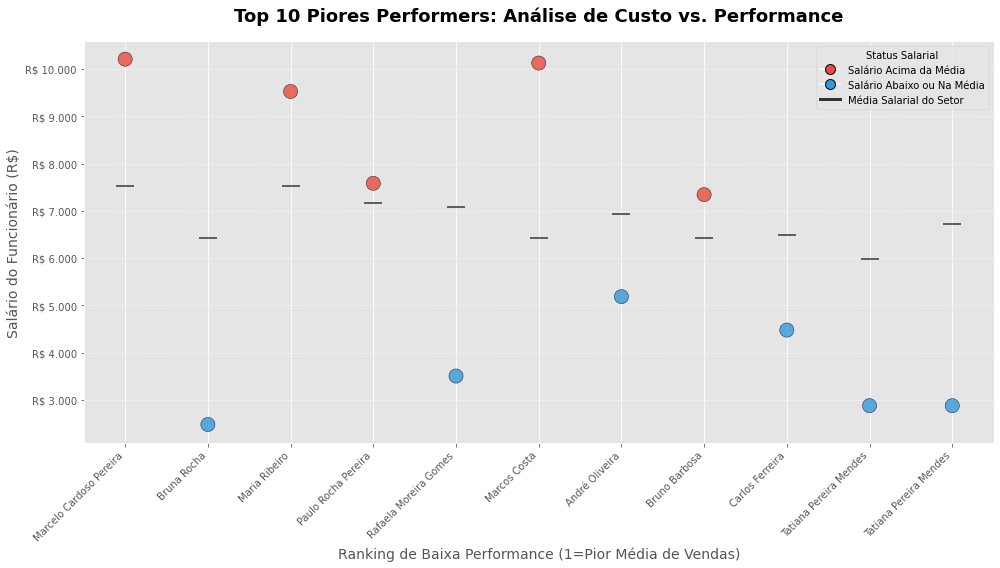

In [36]:
# -*- coding: utf-8 -*-
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.ticker as mticker

# Ignora warnings de seaborn/matplotlib que não afetam a funcionalidade
warnings.filterwarnings("ignore")

# --- Configuração do Banco de Dados ---
# SUBSTITUA PELO SEU CAMINHO CORRETO
DB_FILE = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'
# USANDO A NOVA VIEW FORNECIDA PELO USUÁRIO
VIEW_NAME = 'Desempenho_X_SalarioSetor'

def get_performance_data():
    """Conecta ao banco de dados SQLite e consulta a VIEW integrada."""
    conn = None
    df = pd.DataFrame()
    SQL_QUERY = f'SELECT * FROM {VIEW_NAME}'

    try:
        conn = sqlite3.connect(DB_FILE)
        df = pd.read_sql_query(SQL_QUERY, conn)
        print(f"✅ Dados da VIEW '{VIEW_NAME}' carregados com sucesso.")
    except sqlite3.Error as error:
        print(f"❌ Erro ao acessar o banco de dados SQLite: {error}")
        print("Certifique-se que a VIEW foi criada corretamente com este nome.")
        return pd.DataFrame()
    finally:
        if conn is not None:
            conn.close()
    return df

def plot_dismissal_risk_analysis(df):
    """Gera um gráfico de dispersão para analisar risco de demissão baseado em performance e salário."""
    if df.empty:
        print("Não há dados para plotar.")
        return

    # 1. Análise da Equidade Salarial (criada no Python)
    df['Equidade_Salarial'] = np.where(
        df['Salário'] > df['Média Salarial do Setor'], 
        'Acima da Média', 
        'Abaixo ou Na Média'
    )
    
    # 2. Ordenação e Ranking para o Eixo X
    # O funcionário com a menor média (pior performance) terá o menor índice (mais à esquerda no gráfico)
    df = df.sort_values(by='Média Trimestral', ascending=True).reset_index(drop=True)
    df['Ranking'] = df.index + 1
    
    # 3. Definição de Cores
    color_map = {
        'Acima da Média': '#e74c3c',  # VERMELHO: Risco de Custo/Benefício alto
        'Abaixo ou Na Média': '#3498db' # AZUL: Risco de desmotivação ou Custo/Benefício ok
    }
    
    # 4. Geração do Gráfico de Dispersão (Scatter Plot)
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plota o Salário de cada funcionário (a cor indica a Equidade)
    scatter = ax.scatter(
        df['Ranking'], 
        df['Salário'], 
        s=200, # Tamanho do ponto
        c=df['Equidade_Salarial'].map(color_map), # Cor do ponto
        edgecolors='black',
        alpha=0.8,
        zorder=3
    )
    
    # Plota a Linha de Referência da Média Salarial do Setor
    # Plota um ponto de média salarial para cada funcionário, mas usa a mesma cor de referência (preto/cinza)
    ax.scatter(
        df['Ranking'], 
        df['Média Salarial do Setor'],
        marker='_', # Linha horizontal
        s=300, # Tamanho grande para parecer uma linha
        color='#333333',
        label='Média Salarial do Setor',
        zorder=2
    )
    
    # 5. Configurações do Gráfico
    ax.set_title('Top 10 Piores Performers: Análise de Custo vs. Performance', fontsize=18, weight='bold', pad=20)
    ax.set_xlabel('Ranking de Baixa Performance (1=Pior Média de Vendas)', fontsize=14)
    ax.set_ylabel('Salário do Funcionário (R$)', fontsize=14)
    
    # Formatação do Eixo Y como Moeda (R$)
    def currency_formatter(x, pos):
        return f'R$ {x:,.0f}'.replace(",", "TEMP").replace(".", ",").replace("TEMP", ".")
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))
    
    # Ajusta os rótulos do Eixo X para mostrar o nome do funcionário
    ax.set_xticks(df['Ranking'])
    ax.set_xticklabels(df['Nome do Funcionário'], rotation=45, ha='right', fontsize=10)
    
    # Cria Legenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, 
                          markerfacecolor=color_map[label], markeredgecolor='black')
               for label in color_map.keys()]
    handles.append(plt.Line2D([0], [0], color='#333333', linewidth=3, label='Média Salarial do Setor'))
    
    ax.legend(handles, [f'Salário {l}' for l in color_map.keys()] + ['Média Salarial do Setor'], 
              loc='upper right', title="Status Salarial", frameon=True)
    
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    output_filename = 'risco_demissao_analise.png'
    plt.savefig(output_filename, dpi=300)
    print(f"✅ Gráfico '{output_filename}' salvo com sucesso! O ponto vermelho (Acima da Média) à esquerda do gráfico indica o maior risco.")

if __name__ == "__main__":
    performance_data = get_performance_data()
    plot_dismissal_risk_analysis(performance_data)

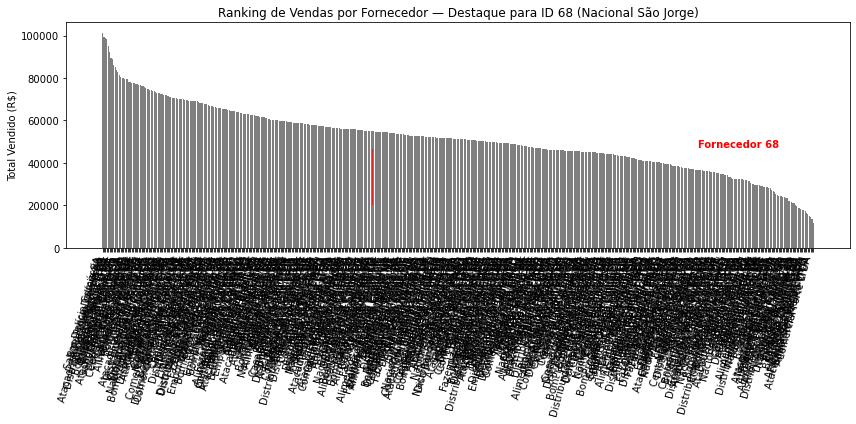

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj"

VIEW = "Produtos_Dos_Fornecedores_Vendidos_Para_Clientes"
FORNECEDOR_TARGET = 68  # Nacional São Jorge

def gerar_grafico_fornecedor_68():
    # Conexão com o banco
    conn = sqlite3.connect(DB_PATH)
    
    # Carregar a view com vendas por fornecedor
    df = pd.read_sql_query(f"SELECT * FROM {VIEW};", conn)
    conn.close()

    # Ordenar do maior para o menor
    df = df.sort_values("Total_Vendido", ascending=False).reset_index(drop=True)

    # Criar uma coluna para definir as cores
    df["Cor"] = df["forn_id"].apply(lambda x: "tab:red" if x == FORNECEDOR_TARGET else "tab:gray")

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    plt.bar(df["forn_nome"], df["Total_Vendido"], color=df["Cor"])
    plt.xticks(rotation=75, ha="right")
    plt.ylabel("Total Vendido (R$)")
    plt.title("Ranking de Vendas por Fornecedor — Destaque para ID 68 (Nacional São Jorge)")

    # Destacar o valor do fornecedor 68 com texto
    row_68 = df[df["forn_id"] == FORNECEDOR_TARGET]
    if not row_68.empty:
        pos = row_68.index[0]
        plt.text(
            pos, 
            row_68["Total_Vendido"].values[0],
            "Fornecedor 68",
            ha="center",
            va="bottom",
            color="red",
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()

# Executa o gráfico
gerar_grafico_fornecedor_68()



In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle

def gauge_chart(valor_atual, valor_total, titulo, cor='#4CAF50'):
    porcentagem = valor_atual / valor_total

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.axis('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.axis('off')

    # Fundo cinza do gauge
    fundo = Wedge(center=(0, 0), r=1, theta1=180, theta2=0, fc='#dddddd')
    ax.add_patch(fundo)

    # Parte preenchida (valor)
    preenchido = Wedge(
        center=(0, 0),
        r=1,
        theta1=180,
        theta2=180 - (180 * porcentagem),
        fc=cor
    )
    ax.add_patch(preenchido)

    # Círculo interno branco
    inner = Circle((0, 0), 0.6, color='white')
    ax.add_patch(inner)

    # Texto da porcentagem
    ax.text(0, 0.05, f"{porcentagem*100:.1f}%",
            ha='center', va='center',
            fontsize=28, fontweight='bold')

    # Texto do valor
    ax.text(0, -0.18, f"{valor_atual:.0f} / {valor_total:.0f}",
            ha='center', va='center', fontsize=13)

    # Título
    ax.text(0, 1.05, titulo,
            ha='center', fontsize=14, fontweight='bold')

    plt.show()


Fornecedor: Nacional São Jorge ME
Ranking: 458 de 1200
Total vendido: R$ 46,654.36


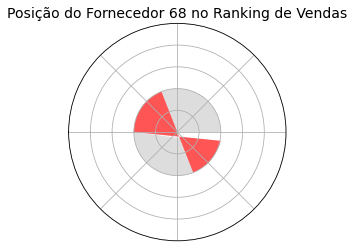

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DB_PATH = "C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj"

# ---------------------------------------------------------
# FUNÇÃO DO GRÁFICO GAUGE / VELOCÍMETRO
# ---------------------------------------------------------
def gauge_chart(value, max_value, title):
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': 'polar'})
    
    # Converte valor para ângulo
    theta = (1 - value / max_value) * np.pi  

    # Fundo
    ax.barh(0, np.pi, left=0, color="#dddddd")

    # Região do valor
    ax.barh(0, theta, left=0, color="#ff5555")

    # Ajustes visuais
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_theta_zero_location("W")
    ax.set_theta_direction(-1)
    ax.set_rlim(0, 1)
    
    ax.set_title(title, fontsize=14)
    plt.show()

# ---------------------------------------------------------
# 1 - Carregar a VIEW de vendas por fornecedor
# ---------------------------------------------------------
conn = sqlite3.connect(DB_PATH)

df = pd.read_sql_query("""
    SELECT forn_id, forn_nome, Total_Vendido
    FROM Produtos_Dos_Fornecedores_Vendidos_Para_Clientes
    ORDER BY Total_Vendido DESC
""", conn)

conn.close()

# ---------------------------------------------------------
# 2 - Encontrar a posição do fornecedor 68
# ---------------------------------------------------------
df["Ranking"] = df["Total_Vendido"].rank(ascending=False, method="min")

forn_68 = df[df["forn_id"] == 68]

if forn_68.empty:
    print("Fornecedor 68 não encontrado na view!")
else:
    nome = forn_68["forn_nome"].values[0]
    ranking = int(forn_68["Ranking"].values[0])
    total_68 = forn_68["Total_Vendido"].values[0]

    # Total de fornecedores diferentes
    total_fornecedores = len(df)

    # Percentual invertido para gauge: ranking melhor = valor maior
    valor_gauge = (total_fornecedores - ranking + 1)
    max_gauge = total_fornecedores

    print(f"Fornecedor: {nome}")
    print(f"Ranking: {ranking} de {total_fornecedores}")
    print(f"Total vendido: R$ {total_68:,.2f}")

    # ---------------------------------------------------------
    # 3 - GERAR O GAUGE DO FORNECEDOR 68
    # ---------------------------------------------------------
    gauge_chart(
        value=valor_gauge,
        max_value=max_gauge,
        title=f"Posição do Fornecedor 68 no Ranking de Vendas"
    )


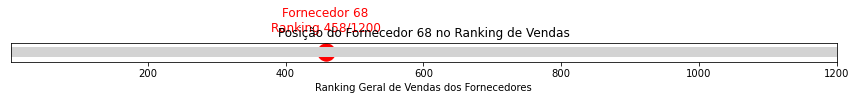

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj"

# ------------------------------------------------------------------
# 1 - Carrega os dados da view de vendas por fornecedor
# ------------------------------------------------------------------
conn = sqlite3.connect(DB_PATH)

df = pd.read_sql_query("""
    SELECT forn_id, forn_nome, Total_Vendido
    FROM Produtos_Dos_Fornecedores_Vendidos_Para_Clientes
    ORDER BY Total_Vendido DESC
""", conn)

conn.close()

# ------------------------------------------------------------------
# 2 - Calcula o ranking
# ------------------------------------------------------------------
df["Ranking"] = df["Total_Vendido"].rank(ascending=False, method="min")
df = df.sort_values("Ranking")

# Dados do fornecedor 68
forn_68 = df[df["forn_id"] == 68]

if forn_68.empty:
    print("Fornecedor 68 não encontrado!")
else:
    ranking_68 = int(forn_68["Ranking"].values[0])
    total_fornecedores = len(df)

    # ------------------------------------------------------------------
    # 3 - Gráfico Linear de Ranking
    # ------------------------------------------------------------------
    plt.figure(figsize=(12, 2))

    # Linha do ranking total
    plt.hlines(1, xmin=1, xmax=total_fornecedores, color="lightgray", linewidth=10)

    # Marcador do fornecedor 68
    plt.scatter(ranking_68, 1, s=300, color="red")

    # Texto mostrando o ranking
    plt.text(ranking_68, 1.1, f"Fornecedor 68\nRanking {ranking_68}/{total_fornecedores}",
             ha="center", va="bottom", fontsize=12, color="red")

    # Ajustes visuais
    plt.yticks([])
    plt.xlabel("Ranking Geral de Vendas dos Fornecedores")
    plt.title("Posição do Fornecedor 68 no Ranking de Vendas")

    plt.xlim(1, total_fornecedores)
    plt.tight_layout()
    plt.show()


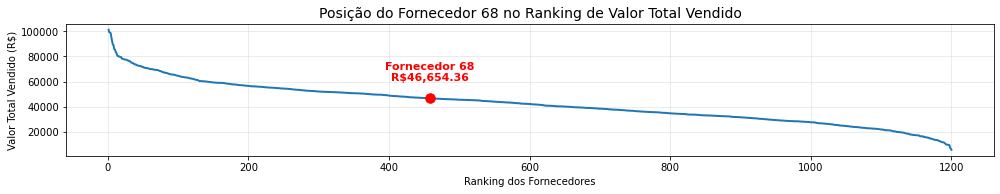

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj"
VIEW_VENDAS = "Produtos_Dos_Fornecedores_Vendidos_Para_Clientes"

def carregar_dados():
    conn = sqlite3.connect(DB_PATH)
    df = pd.read_sql_query(f"SELECT * FROM {VIEW_VENDAS}", conn)
    conn.close()
    return df

def grafico_posicao_fornecedor_68():
    df = carregar_dados()

    # Ordenar pela coluna Total_Vendido
    df = df.sort_values("Total_Vendido", ascending=False).reset_index(drop=True)
    df["Ranking"] = df.index + 1

    # Pegar posição do fornecedor 68
    dado_68 = df[df["forn_id"] == 68].iloc[0]
    posicao = int(dado_68["Ranking"])
    valor = float(dado_68["Total_Vendido"])

    plt.figure(figsize=(14, 2.8))

    # Linha horizontal
    plt.plot(df["Ranking"], df["Total_Vendido"], linewidth=2)

    # Marcador vermelho fornecedor 68
    plt.scatter(posicao, valor, color="red", s=90, zorder=10)

    # Texto do marcador agora MAIS para cima (ajustado)
    plt.text(
        posicao,
        valor + (df["Total_Vendido"].max() * 0.12),   # AUMENTEI A ELEVAÇÃO AQUI
        f"Fornecedor 68\nR${valor:,.2f}",
        color="red",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

    plt.title("Posição do Fornecedor 68 no Ranking de Valor Total Vendido", fontsize=14)
    plt.xlabel("Ranking dos Fornecedores")
    plt.ylabel("Valor Total Vendido (R$)")
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


grafico_posicao_fornecedor_68()


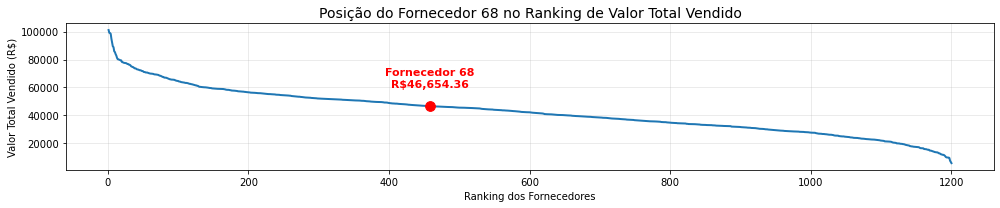

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

DB_PATH = "C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj"
VIEW_VENDAS = "Produtos_Dos_Fornecedores_Vendidos_Para_Clientes"

# ⭐️ Escolha aqui o ID do fornecedor que quer visualizar:
FORNECEDOR_ID = 68  # altere para qualquer ID

def carregar_dados():
    conn = sqlite3.connect(DB_PATH)
    df = pd.read_sql_query(f"SELECT * FROM {VIEW_VENDAS}", conn)
    conn.close()
    return df

def grafico_posicao_fornecedor(forn_id):
    df = carregar_dados()

    # Ordenar pela coluna Total_Vendido
    df = df.sort_values("Total_Vendido", ascending=False).reset_index(drop=True)
    df["Ranking"] = df.index + 1

    # Verificar se o fornecedor existe
    if forn_id not in df["forn_id"].values:
        print(f"Fornecedor {forn_id} não encontrado na View.")
        return

    # Pegar posição do fornecedor selecionado
    dado = df[df["forn_id"] == forn_id].iloc[0]
    posicao = int(dado["Ranking"])
    valor = float(dado["Total_Vendido"])

    plt.figure(figsize=(14, 3))

    # Linha geral
    plt.plot(df["Ranking"], df["Total_Vendido"], linewidth=2)

    # Marcador do fornecedor escolhido
    plt.scatter(posicao, valor, color="red", s=95, zorder=10)

    # Texto ajustado mais para cima
    plt.text(
        posicao,
        valor + (df["Total_Vendido"].max() * 0.12),
        f"Fornecedor {forn_id}\nR${valor:,.2f}",
        color="red",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold"
    )

    plt.title(f"Posição do Fornecedor {forn_id} no Ranking de Valor Total Vendido", fontsize=14)
    plt.xlabel("Ranking dos Fornecedores")
    plt.ylabel("Valor Total Vendido (R$)")
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


# Chamada do gráfico usando a variável configurada no topo
grafico_posicao_fornecedor(FORNECEDOR_ID)


In [9]:
import pandas as pd
import sqlite3
import plotly.graph_objects as go

# --- CONFIGURAÇÃO ---
# Mantenha o nome do seu arquivo de banco de dados SQLite aqui
NOME_ARQUIVO_BD = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj' 
NOME_DA_VIEW = 'VIEW_FLUXO_SETOR_CARGO'

# --- 1. CONEXÃO E EXTRAÇÃO DE DADOS ---
try:
    conexao = sqlite3.connect(NOME_ARQUIVO_BD)
    # Consulta a VIEW que já preparamos
    query = f"SELECT Origem_Setor, Destino_Cargo, Contagem_Funcionarios FROM {NOME_DA_VIEW}"
    
    # Carrega os dados diretamente da VIEW para um DataFrame do Pandas
    df = pd.read_sql_query(query, conexao)
    conexao.close()
    
except Exception as e:
    print(f"Erro ao conectar ou executar a consulta SQL: {e}")
    exit()

# --- 2. PREPARAÇÃO DOS DADOS PARA O PLOTLY ---
# O Plotly Sankey precisa de nós (nodes) representados por índices numéricos, não strings.

# Cria uma lista única de todos os nós (Origens e Destinos)
todos_os_nomes = list(df['Origem_Setor'].unique()) + list(df['Destino_Cargo'].unique())
nomes_unicos = pd.Series(todos_os_nomes).unique()

# Cria um mapeamento de string para índice (nome -> 0, 1, 2, ...)
nome_para_indice = {nome: i for i, nome in enumerate(nomes_unicos)}

# Aplica o mapeamento para criar as colunas de "source" e "target"
df['source'] = df['Origem_Setor'].apply(lambda x: nome_para_indice[x])
df['target'] = df['Destino_Cargo'].apply(lambda x: nome_para_indice[x])
df['value'] = df['Contagem_Funcionarios']


# --- 3. CRIAÇÃO E RENDERIZAÇÃO DO DIAGRAMA SANKEY ---

fig = go.Figure(data=[go.Sankey(
    # Configuração dos nós (rótulos)
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nomes_unicos,
        color = "blue"  # Cor dos retângulos dos nós
    ),
    # Configuração dos links (fluxos)
    link = dict(
        source = df['source'],    # O índice do nó de origem (Source)
        target = df['target'],    # O índice do nó de destino (Target)
        value = df['value'],      # O valor do fluxo (Contagem)
        # Por padrão, o Plotly colore os fluxos com base na origem.
    )
)])

# Adiciona o título
fig.update_layout(title_text="Fluxo de Funcionários: Setor para Cargo (Diagrama de Sankey)", font_size=10)

# SALVA O GRÁFICO COMO UM ARQUIVO HTML ESTÁTICO
fig.write_html("sankey_funcionarios_output.html")

# Imprime uma mensagem para confirmar que o script terminou
print("Gráfico gerado com sucesso! Verifique o arquivo 'sankey_funcionarios_output.html' na pasta do seu projeto.")

Gráfico gerado com sucesso! Verifique o arquivo 'sankey_funcionarios_output.html' na pasta do seu projeto.


In [11]:
import pandas as pd
import sqlite3
import plotly.express as px

# --- CONFIGURAÇÃO ---
NOME_ARQUIVO_BD = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'
NOME_DA_VIEW = 'Endereco_De_Clientes'

# --- 1. CONEXÃO E EXTRAÇÃO DE DADOS ---
try:
    conexao = sqlite3.connect(NOME_ARQUIVO_BD)
    query = f"SELECT Estado, Total_Arrecadado FROM {NOME_DA_VIEW}"
    df_mapa = pd.read_sql_query(query, conexao)
    conexao.close()
    
except Exception as e:
    print(f"Erro ao conectar ou executar a consulta SQL: {e}")
    exit()

# --- 2. GERAÇÃO DO MAPA COROPLÉTICO ---
# Certifique-se de que a coluna 'Estado' contem as siglas (SP, RJ, etc.)
fig = px.choropleth(
    df_mapa, 
    # Mapeia a sigla do estado
    locations='Estado', 
    # Mapeia os dados do Brasil
    scope='south america', 
    # Coluna que define a intensidade da cor (Total_Arrecadado)
    color='Total_Arrecadado', 
    hover_name='Estado', 
    # Define o conjunto de cores.
    color_continuous_scale=px.colors.sequential.YlOrRd, 
    labels={'Total_Arrecadado':'Arrecadação Total (R$)'} 
)

# --- 3. AJUSTES FINOS E EXIBIÇÃO ---

# Configurações para focar no mapa do Brasil e exibir as subunidades
fig.update_geos(
    # Desabilita as fronteiras dos países
    showcountries=False, 
    # Desenha as fronteiras dos estados
    showsubunits=True, 
    # Centraliza a visualização no Brasil
    center={'lat': -14, 'lon': -50}, 
    # Ajusta o nível de zoom para o país
    projection_scale=3,
    lataxis_range=[-35, 5],
    lonaxis_range=[-75, -30]
)

fig.update_layout(
    title_text='Arrecadação por Estado (Mapa Coroplético)',
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Salva o gráfico como HTML
fig.write_html("mapa_arrecadacao_brasil_corrigido.html")
print("Mapa gerado com sucesso! Verifique o arquivo 'mapa_arrecadacao_brasil_corrigido.html'.")

# fig.show()

Mapa gerado com sucesso! Verifique o arquivo 'mapa_arrecadacao_brasil_corrigido.html'.


In [12]:
import pandas as pd
import sqlite3
import plotly.express as px

# --- CONFIGURAÇÃO ---
# Verifique se o caminho do seu arquivo .db está correto!
NOME_ARQUIVO_BD = 'C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj'
NOME_DA_VIEW = 'Endereco_De_Clientes_ISO' # <-- USANDO A NOVA VIEW

# --- 1. CONEXÃO E EXTRAÇÃO DE DADOS ---
try:
    conexao = sqlite3.connect(NOME_ARQUIVO_BD)
    # Consulta a nova VIEW com as siglas formatadas
    query = f"SELECT Estado_ISO, Total_Arrecadado FROM {NOME_DA_VIEW}"
    df_mapa = pd.read_sql_query(query, conexao)
    conexao.close()
    
except Exception as e:
    print(f"Erro ao conectar ou executar a consulta SQL: {e}")
    exit()

# --- 2. GERAÇÃO DO MAPA COROPLÉTICO ---

fig = px.choropleth(
    df_mapa, 
    # Usamos o código ISO formatado (BR-SP, BR-RJ)
    locations='Estado_ISO', 
    # Indicamos que os códigos são subunidades de países (type='ISO-3166-2')
    locationmode='ISO-3',
    # Não usamos 'south america'. O Plotly infere o país a partir dos códigos 'BR-XX'.
    color='Total_Arrecadado', 
    hover_name='Estado_ISO', 
    color_continuous_scale=px.colors.sequential.YlOrRd, 
    labels={'Total_Arrecadado':'Arrecadação Total (R$)'} 
)

# --- 3. AJUSTES FINOS E EXIBIÇÃO ---

# Forçamos o zoom no Brasil
fig.update_geos(
    visible=False,
    # Define o centro do mapa no Brasil
    center={'lat': -14, 'lon': -50},
    # Ajusta o nível de zoom
    lataxis_range=[-35, 5], 
    lonaxis_range=[-75, -30],
    # Garante que os contornos sejam exibidos
    showsubunits=True,
    subunitcolor="black",
    subunitwidth=0.5
)

fig.update_layout(
    title_text='Arrecadação por Estado (Mapa Coroplético)',
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Salva o gráfico como HTML
fig.write_html("mapa_arrecadacao_brasil_final.html")
print("Mapa gerado com sucesso! Verifique o arquivo 'mapa_arrecadacao_brasil_final.html'.")

Mapa gerado com sucesso! Verifique o arquivo 'mapa_arrecadacao_brasil_final.html'.


In [13]:
# ... (O código de importação e extração de dados permanece igual) ...

# --- 2. GERAÇÃO DO MAPA COROPLÉTICO ---

fig = px.choropleth(
    df_mapa, 
    # Usamos o código ISO formatado (BR-SP, BR-RJ)
    locations='Estado_ISO', 
    # IMPORTANTE: Usamos o escopo MUNDIAL
    scope='world', 
    # Indicamos que os códigos são subunidades (ISO-3166-2)
    locationmode='ISO-3',
    color='Total_Arrecadado', 
    hover_name='Estado_ISO', 
    color_continuous_scale=px.colors.sequential.YlOrRd, 
    labels={'Total_Arrecadado':'Arrecadação Total (R$)'} 
)

# --- 3. AJUSTES FINOS E EXIBIÇÃO ---

# Forçamos o zoom no Brasil usando projection_scale
fig.update_geos(
    # Foco na América do Sul
    scope='south america', 
    showcountries=True, 
    countrycolor="black", 
    # Foco no Brasil
    center={'lat': -14, 'lon': -50},
    # Ajustamos o nível de zoom
    projection_scale=3.5,
    showsubunits=True,
    subunitcolor="black",
    subunitwidth=0.5
)

fig.update_layout(
    title_text='Arrecadação por Estado (Mapa Coroplético)',
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Salva o gráfico como HTML
fig.write_html("mapa_arrecadacao_brasil_final.html")
print("Mapa gerado com sucesso! Verifique o arquivo 'mapa_arrecadacao_brasil_final.html'.")

Mapa gerado com sucesso! Verifique o arquivo 'mapa_arrecadacao_brasil_final.html'.


In [23]:
# ============================================================
# 1. Imports
# ============================================================
import sqlite3
import pandas as pd
import plotly.express as px
import json

# ============================================================
# 2. Conectar ao banco e carregar dados da VIEW
# ============================================================
conn = sqlite3.connect("seu_banco.db")

df = pd.read_sql_query("""
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
""", conn)

conn.close()

import sqlite3
import pandas as pd
import plotly.express as px
import json

# 1. Ler do banco
conn = sqlite3.connect("seu_banco.db")
df = pd.read_sql_query("""
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
""", conn)
conn.close()

display(df.head())

# 2. Ler o geojson *com o caminho que vimos na imagem*
with open(r"C:\Users\Mateus Szabo\brasil_estados.geojson", "r", encoding="utf-8") as f:
    geo = json.load(f)

# 3. Plotar
fig = px.choropleth(
    df,
    geojson=geo,
    locations="Estado_ISO",
    color="Total_Arrecadado",
    featureidkey="properties.id",
    color_continuous_scale="Viridis",
    projection="mercator"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


print("Prévia dos dados lidos da view:")
display(df.head())

# ============================================================
# 3. Carregar o GeoJSON dos estados do Brasil
# ============================================================
# OBS: O arquivo brasil_estados.geojson precisa estar na mesma pasta do notebook.
# Se você quiser que eu gere esse arquivo, é só dizer "gera o geojson".

with open("brasil_estados.geojson", "r", encoding="utf-8") as f:
    geo = json.load(f)

# ============================================================
# 4. Criar o mapa coroplético
# ============================================================
fig = px.choropleth(
    df,
    geojson=geo,
    locations="Estado_ISO",        # Ex: "BR-SP"
    color="Total_Arrecadado",
    color_continuous_scale="Viridis",
    featureidkey="properties.id",  # Onde está o código ISO no GeoJSON
    projection="mercator"
)

# Ajustes visuais
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title="Total Arrecadado por Estado (Mapa Coroplético do Brasil)",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


DatabaseError: Execution failed on sql '
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
': no such table: Endereco_De_Clientes_ISO

In [24]:
import sqlite3
import pandas as pd
import plotly.express as px
import json

# 1. Ler do banco
conn = sqlite3.connect("seu_banco.db")
df = pd.read_sql_query("""
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
""", conn)
conn.close()

display(df.head())

# 2. Ler o geojson *com o caminho que vimos na imagem*
with open(r"C:\Users\Mateus Szabo\brasil_estados.geojson", "r", encoding="utf-8") as f:
    geo = json.load(f)

# 3. Plotar
fig = px.choropleth(
    df,
    geojson=geo,
    locations="Estado_ISO",
    color="Total_Arrecadado",
    featureidkey="properties.id",
    color_continuous_scale="Viridis",
    projection="mercator"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


DatabaseError: Execution failed on sql '
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
': no such table: Endereco_De_Clientes_ISO

In [25]:
import sqlite3
import pandas as pd
import plotly.express as px
import json

# 1. Ler do banco
conn = sqlite3.connect("seu_banco.db")
df = pd.read_sql_query("""
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
""", conn)
conn.close()

display(df.head())

# 2. Ler o geojson *com o caminho que vimos na imagem*
with open(r"C:/Users/Mateus Szabo/brasil_estados.geojson", "r", encoding="utf-8") as f:
    geo = json.load(f)

# 3. Plotar
fig = px.choropleth(
    df,
    geojson=geo,
    locations="Estado_ISO",
    color="Total_Arrecadado",
    featureidkey="properties.id",
    color_continuous_scale="Viridis",
    projection="mercator"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


DatabaseError: Execution failed on sql '
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
': no such table: Endereco_De_Clientes_ISO

In [27]:
import sqlite3
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# ------------------------
# 1. Carregar a VIEW do banco
# ------------------------
conn = sqlite3.connect("C:/Users/Mateus Szabo/Documents/Supermercado/SupermercadoProj")

df = pd.read_sql_query("""
    SELECT Estado_ISO, Total_Arrecadado
    FROM Endereco_De_Clientes_ISO
""", conn)

conn.close()

print("Dados carregados do banco:")
print(df.head())

# ------------------------
# 2. Carregar o GeoJSON
# ------------------------
mapa = gpd.read_file("brazil_geojson.json")

print("\nColunas do GeoJSON:")
print(mapa.columns)

# ------------------------
# 3. Fazer o merge (juntar tabela + mapa)
# ------------------------
# Seu ISO vem no formato "BR-SP"
# O GeoJSON usa "SIGLA_UF" (SP, RJ, MG, ...)
# Então geramos o mesmo formato:

mapa["Estado_ISO"] = "BR-" + mapa["SIGLA_UF"]

# juntar
df_mapa = mapa.merge(df, on="Estado_ISO", how="left")

# ------------------------
# 4. Plotar o mapa
# ------------------------
fig, ax = plt.subplots(figsize=(12, 10))
df_mapa.plot(
    column="Total_Arrecadado",
    legend=True,
    cmap="OrRd",
    linewidth=0.5,
    edgecolor="black",
    ax=ax
)

ax.set_title("Arrecadação Total por Estado (BR-XX)", fontsize=16)
plt.show()


ModuleNotFoundError: No module named 'geopandas'

In [32]:
import geopandas as gpd
gpd.__version__


ModuleNotFoundError: No module named 'geopandas'

In [33]:
import geopandas as gpd
gpd.__version__


ModuleNotFoundError: No module named 'geopandas'